# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.numeric import full
import seaborn as sns
import scipy.stats as st
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import math
import datetime


import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import warnings

import pickle

sns.set()
warnings.filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, log_loss, precision_recall_fscore_support, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import RandomOverSampler, SMOTE

from pprint import pprint

from xgboost import XGBRegressor, XGBClassifier

from sklearn.tree import DecisionTreeClassifier




In [ ]:
import joblib

# **Data loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', None)
loan_data = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')
loan_data.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [ ]:
#exploring the data info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# **Preprocessing**

In [ ]:
# Count total rows in each column which contain null values
loan_data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [ ]:
# Check for duplicates in the data
sum(loan_data.duplicated())

0

In [ ]:
#imputing the NaN categorical values with "unknown"
categorical = loan_data.select_dtypes(include=["object"]).columns.values
loan_data[categorical] = loan_data[categorical].fillna("Unknown")

loan_data.select_dtypes(exclude=[np.number]).isnull().sum() 

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

# **Univariate analysis**

<Axes: xlabel='ProsperRating (numeric)', ylabel='Count'>

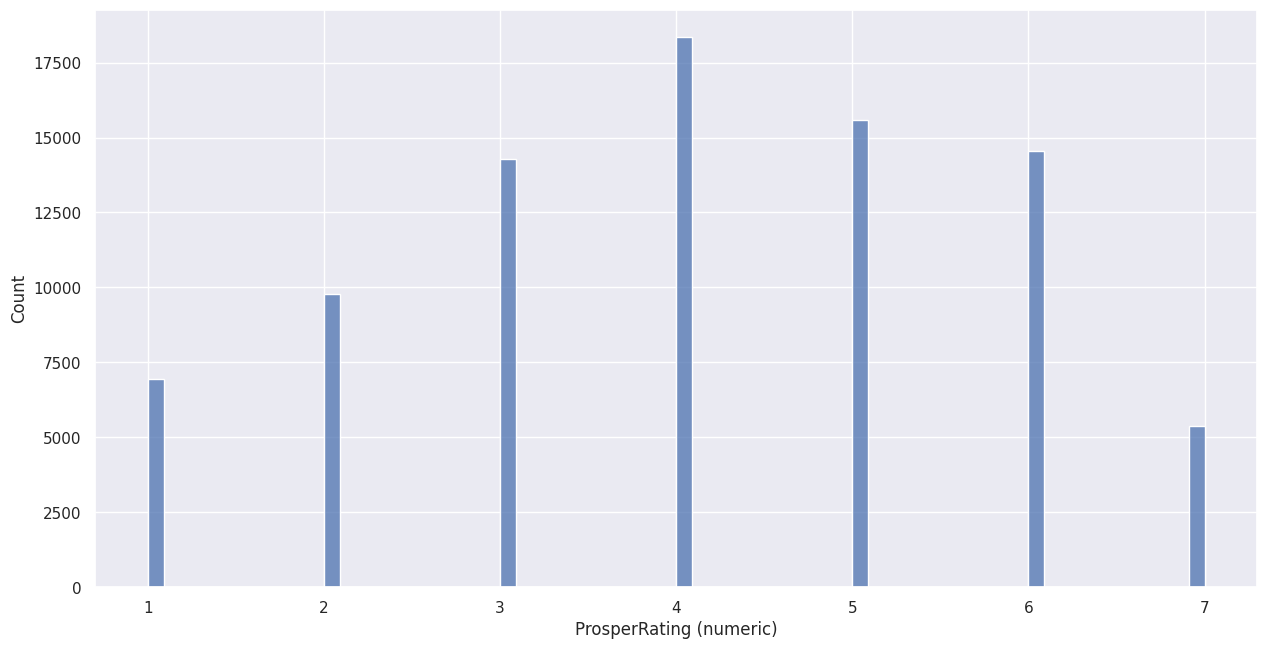

In [ ]:
#dropping the rate (alpha) as the numeric column is corresponding to it and easier to deal with
loan_data.drop(['ProsperRating (Alpha)'], axis=1, inplace=True)
sns.histplot(data=loan_data['ProsperRating (numeric)'])

<Axes: xlabel='ProsperScore', ylabel='Count'>

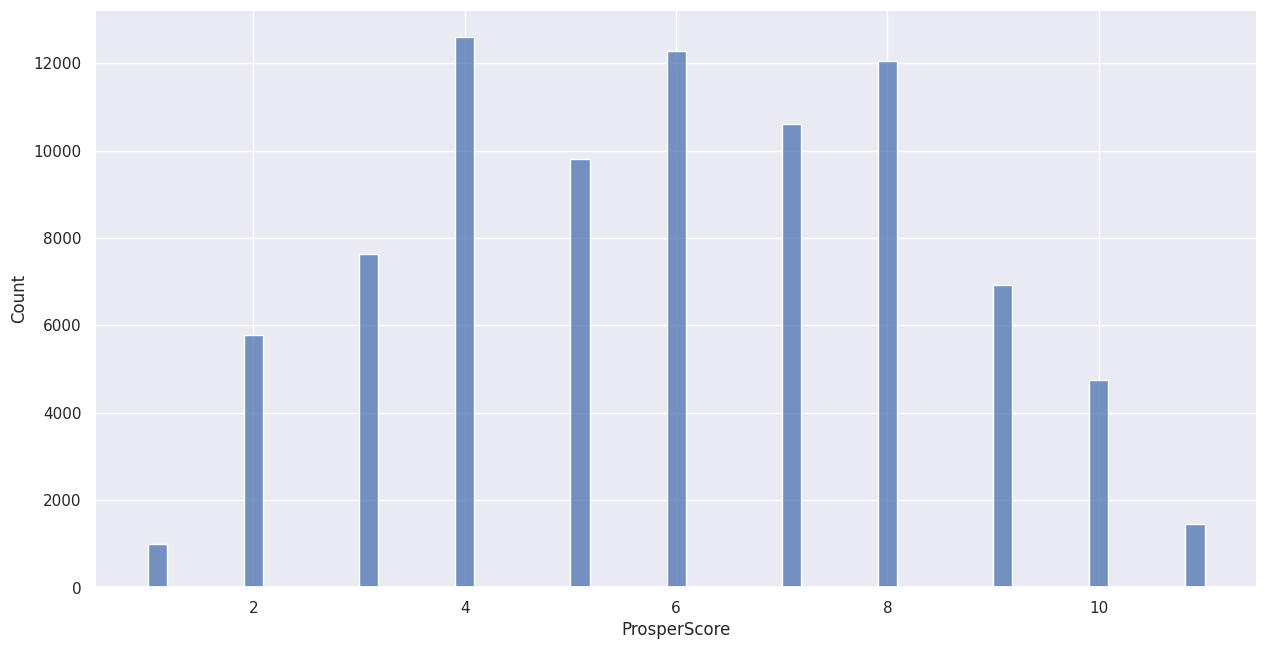

In [ ]:
sns.histplot(data=loan_data['ProsperScore'])

In [ ]:
#The numeric ProsperRating and the ProsperScore NaNs can both be replaced with mean values.

loan_data["ProsperRating (numeric)"].fillna(loan_data["ProsperRating (numeric)"].mean(), inplace=True)
loan_data["ProsperScore"].fillna(loan_data["ProsperScore"].mean(), inplace=True)


loan_data["ProsperRating (numeric)"].isnull().sum(), loan_data["ProsperScore"].isnull().sum()

(0, 0)

In [ ]:
#investigating the debt to income ratio NaN values
loan_data_debt_income_null = loan_data[loan_data["DebtToIncomeRatio"].isnull()]
loan_data_debt_income_null[:5]

ListingKey  ListingNumber            ListingCreationDate  \
40   10A43601079743929992413        1167746  2014-01-27 12:02:57.523000000   
69   0F37360159310530849DA23        1162592  2014-01-25 12:07:54.537000000   
78   0DFE3425061927556BB8A75         359657  2008-06-29 23:23:40.157000000   
100  0F67356860455769574096F         704916  2013-01-25 11:48:26.040000000   
103  0F843543787869030F017F8         579737  2012-04-17 11:58:52.270000000   

    CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
40      Unknown    60     Current              Unknown      0.19630   
69      Unknown    60     Current              Unknown      0.13636   
78            A    36  Chargedoff  2009-04-09 00:00:00      0.18454   
100     Unknown    36  Chargedoff  2013-08-30 00:00:00      0.35356   
103     Unknown    36  Chargedoff  2013-03-22 00:00:00      0.26681   

     BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
40         0.1725       0.1625  ...          -12.33               0.00   
69         0.1139       0.1039  ...           -7.15               0.00   
78         0.1700       0.1600  ...          -15.66               0.00   
100        0.3134       0.3034  ...           -6.41               0.00   
103        0.2287       0.2187  ...          -49.41            -813.65   

     LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
40                    0.00                 0.00   
69                    0.00                 0.00   
78                 4381.62              4381.62   
100                3855.23              3855.23   
103               13880.95             13880.95   

     LP_NonPrincipalRecoverypayments  PercentFunded Recommendations  \
40                               0.0            1.0               0   
69                               0.0            1.0               0   
78                               0.0            1.0               0   
100                              0.0            1.0               0   
103                           1600.0            1.0               0   

    InvestmentFromFriendsCount InvestmentFromFriendsAmount  Investors  
40                           0                         0.0          3  
69                           0                         0.0          1  
78                           0                         0.0        115  
100                          0                         0.0         73  
103                          0                         0.0         21  

[5 rows x 80 columns]

In [ ]:
#noticing that the row has both monthly income and monthly payment
loan_data.loc[40]
loan_data.loc[40, "MonthlyLoanPayment"], loan_data.loc[40, "StatedMonthlyIncome"]

(374.81, 12750.0)

In [ ]:
#noticing that all rows have both monthly income and monthly payment
loan_data_debt_income_null["MonthlyLoanPayment"].isnull().sum(), loan_data_debt_income_null["StatedMonthlyIncome"].isnull().sum()

(0, 0)

In [ ]:
#the idea is that the income is not verified
loan_data_debt_income_null["IncomeVerifiable"][:10]

40     False
69     False
78     False
100    False
103    False
105    False
108    False
125    False
131    False
170    False
Name: IncomeVerifiable, dtype: bool

In [ ]:
#Calculate DebtToIncomeRatio for unverifiable incomes, adding $1 to account for $0/month incomes
loan_data["DebtToIncomeRatio"].fillna(loan_data["MonthlyLoanPayment"] / (loan_data["StatedMonthlyIncome"] + 1), inplace = True)

loan_data["DebtToIncomeRatio"].isnull().sum()

0

In [ ]:
#Because APR is equal to the borrower rate + fees, let's calculate the median difference between the two, and add that value to the borrower rate of our data points missing an APR.
borrower_fees = loan_data["BorrowerAPR"] - loan_data["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [ ]:
loan_data["BorrowerAPR"].fillna(loan_data["BorrowerRate"] + borrower_fees.median(), inplace=True)

loan_data["BorrowerAPR"].isnull().sum()

0

In [ ]:
#EstimatedEffectiveYield will always be the borrower rate minus some expected loss from interest charge-offs and fees.
estimated_loss_from_fees = loan_data["BorrowerRate"] - loan_data["EstimatedEffectiveYield"]
fees_med=estimated_loss_from_fees.median()

loan_data["EstimatedEffectiveYield"].fillna(loan_data["BorrowerRate"] - fees_med, inplace=True)

loan_data["EstimatedEffectiveYield"].isnull().sum()

0

In [ ]:
#replacing the NaN values in the estimated loss by the median as it's hard to calculate it with a closed formula
loan_data["EstimatedLoss"].fillna(loan_data["EstimatedLoss"].median(), inplace=True)

loan_data["EstimatedLoss"].isnull().sum()

0

In [ ]:
#EstimatedReturn is defined as EstimatedEffectiveYield - EstimatedLoss.
loan_data["EstimatedReturn"].fillna(loan_data["EstimatedEffectiveYield"] - loan_data["EstimatedLoss"], inplace=True)

loan_data["EstimatedReturn"].isnull().sum()

0

In [ ]:
#dropping the rows with NaN values as they are hard to be filled with 0's, medain, or the mean

loan_data.dropna(subset=["EmploymentStatusDuration","CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines","TotalCreditLinespast7years"], inplace=True)
loan_data.shape

(106290, 80)

In [ ]:
#filling NaN values in the columns related to prosper variables with 0's as they are hard to be filled with another value
#also their rows cannot be dropped as they are representing most of the dataset
prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

loan_data[prosper_vars] = loan_data[prosper_vars].fillna(0)

loan_data.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                                0
Term                                       0
LoanStatus                                 0
ClosedDate                                 0
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                            0
ProsperRating (numeric)                    0
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                                 0
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey  

In [ ]:
#dropping the two columns with the remaining irreplacable NaN values
#since the change in the score is dependent on prosper values which are mostly missing we are dropping it as it also makes no sense to be replaced with 0

loan_data.drop("ScorexChangeAtTimeOfListing", axis=1, inplace=True)
loan_data.drop("LoanFirstDefaultedCycleNumber", axis=1, inplace=True)


In [ ]:
loan_data.shape

(106290, 78)

In [ ]:
# Convert 'ListingCreationDate' type from str to datetime 
loan_data['ListingCreationDate']=pd.to_datetime(loan_data['ListingCreationDate'])

# Extract date information from ListingCreationDate column
loan_data['date'] = loan_data['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
loan_data['year']= loan_data['ListingCreationDate'].dt.year

# Extract month information from ListingCreationDate column
loan_data['month'] = loan_data['ListingCreationDate'].dt.month

# Convert 'date' type from str to datetime 
loan_data['date']=pd.to_datetime(loan_data['date'])
# loan_data['year']=pd.to_datetime(loan_data['year'])

# Drop unused column
loan_data.drop(['ListingCreationDate'], axis=1, inplace=True)

In [ ]:
loan_data['month'].unique()



array([ 8,  2, 10,  9, 12,  4,  5,  7, 11,  1,  6,  3])

In [ ]:
loan_data['year'].unique()

array([2007, 2014, 2012, 2013, 2010, 2011, 2008, 2009])

In [ ]:
loan_data['date'].unique()

array(['2007-08-26T00:00:00.000000000', '2014-02-27T00:00:00.000000000',
       '2012-10-22T00:00:00.000000000', ...,
       '2009-12-26T00:00:00.000000000', '2010-12-25T00:00:00.000000000',
       '2010-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# Convert 'LoanOriginationDate' type from str to datetime 
loan_data['LoanOriginationDate']=pd.to_datetime(loan_data['LoanOriginationDate'])
loan_data['ListingNumber']=loan_data['ListingNumber'].astype(str)
loan_data['ProsperScore']=loan_data['ProsperScore'].astype(int)


In [ ]:
loan_data['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [ ]:
#creating a new column by replacing the numbers in the listing category with their references
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_data['ListingCategory'] = loan_data['ListingCategory (numeric)'].map(list_dict)
#loan_data.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [ ]:
#dropping IDs that won't matter in the analysis as they are admin stuff
loan_data.drop([#"ListingKey", 
                "ListingNumber", "LoanKey", "LoanNumber","MemberKey"], axis=1, inplace=True)

In [ ]:
#dropping the dates
loan_data.drop(["ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter"], axis=1, inplace=True)

In [ ]:
# #dropping another set of columns as they are unrelated to our analysis.
# #they are related to current loans at the present so they are beyond our scope of analysis
# loan_data.drop(["LoanCurrentDaysDelinquent", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
#          "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
#          "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)
loan_data.drop(["LoanCurrentDaysDelinquent"],axis=1, inplace=True)


In [ ]:
# Count total rows in each column which contain null values
loan_data.isnull().sum()

ListingKey                             0
CreditGrade                            0
Term                                   0
LoanStatus                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey                               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLines                     0
OpenCreditLines 

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 72 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           106290 non-null  object        
 1   CreditGrade                          106290 non-null  object        
 2   Term                                 106290 non-null  int64         
 3   LoanStatus                           106290 non-null  object        
 4   BorrowerAPR                          106290 non-null  float64       
 5   BorrowerRate                         106290 non-null  float64       
 6   LenderYield                          106290 non-null  float64       
 7   EstimatedEffectiveYield              106290 non-null  float64       
 8   EstimatedLoss                        106290 non-null  float64       
 9   EstimatedReturn                      106290 non-null  float64       
 

In [ ]:
# 'StatedMonthlyIncome' is enough
loan_data.drop(['IncomeRange'], axis=1, inplace=True)

<Axes: xlabel='count', ylabel='LoanStatus'>

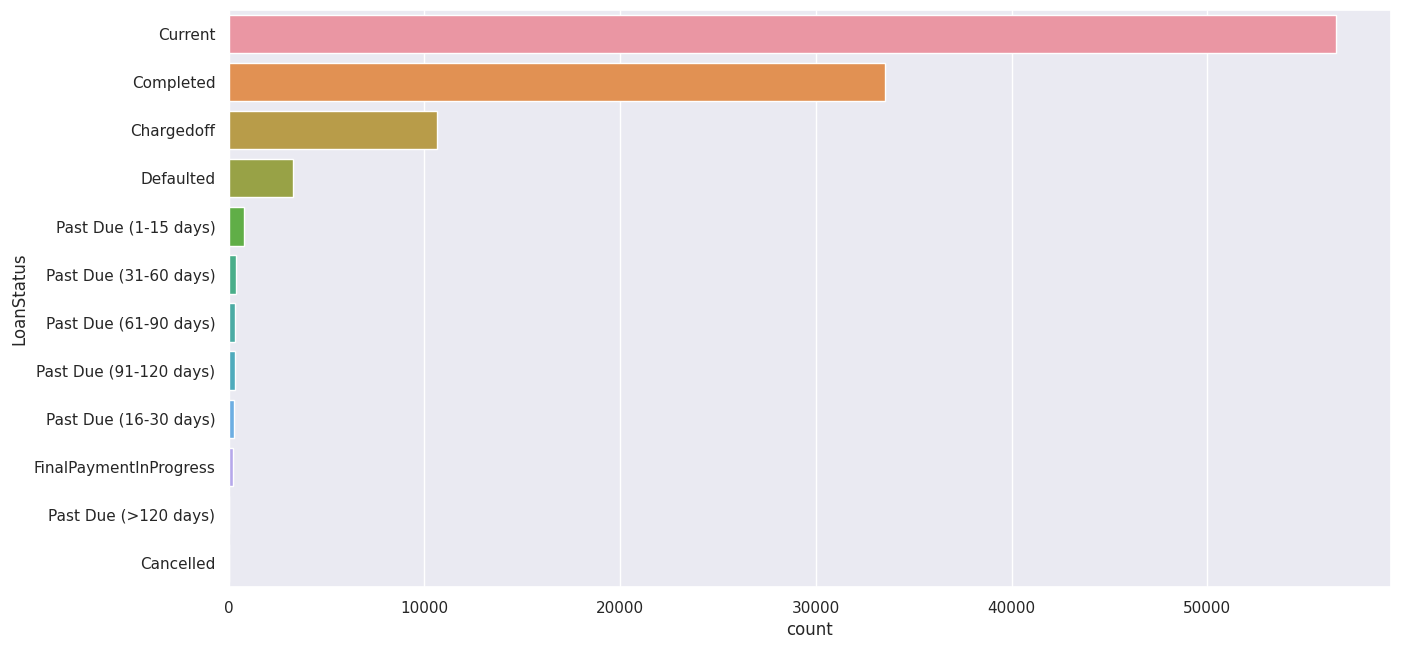

In [ ]:
# Order the categorical variable 
status_order=loan_data.LoanStatus.value_counts().index

# Plot 
sns.countplot(data=loan_data, y='LoanStatus', order=status_order)

the value counts of our target variable
more than 60% of the loans are current and will be dropped then aggregate the other types

In [ ]:
loan_data["LoanStatus"].value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

the prosper score is normally distributed in a bell shaped curve meanning that it's accurate and most loans are mid risk

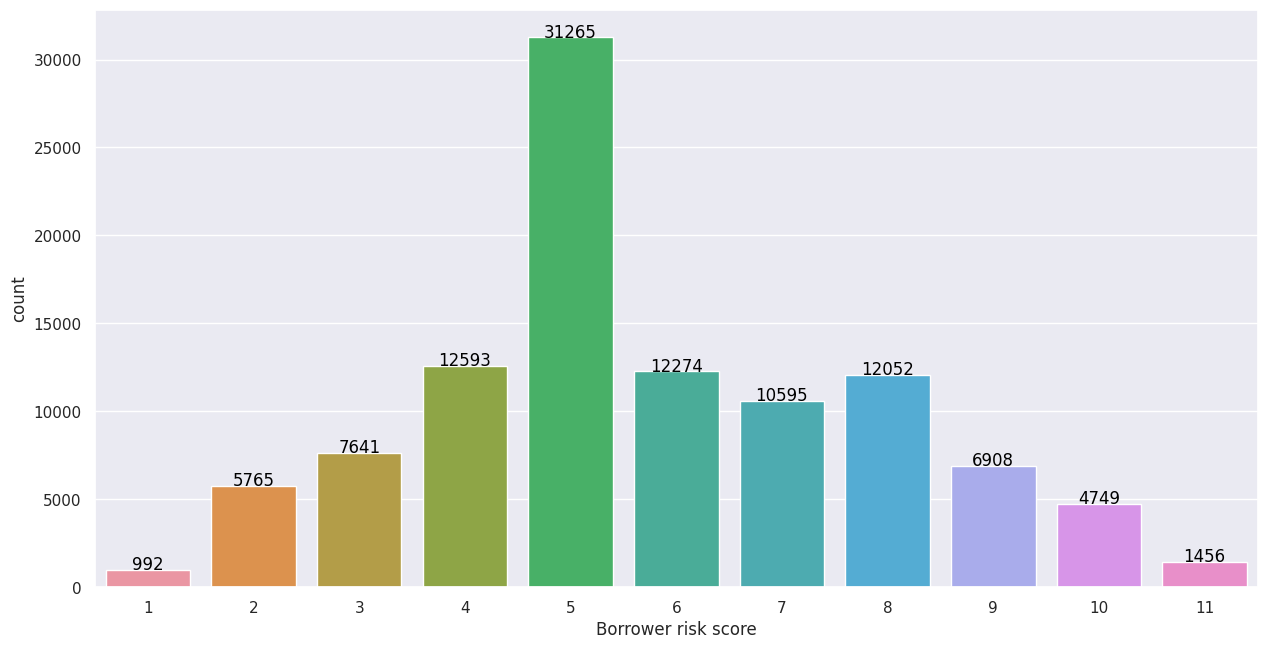

In [ ]:
sns.countplot(data=loan_data, x='ProsperScore');
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = loan_data['ProsperScore'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

the prosper rating is matching the score in the previous plot

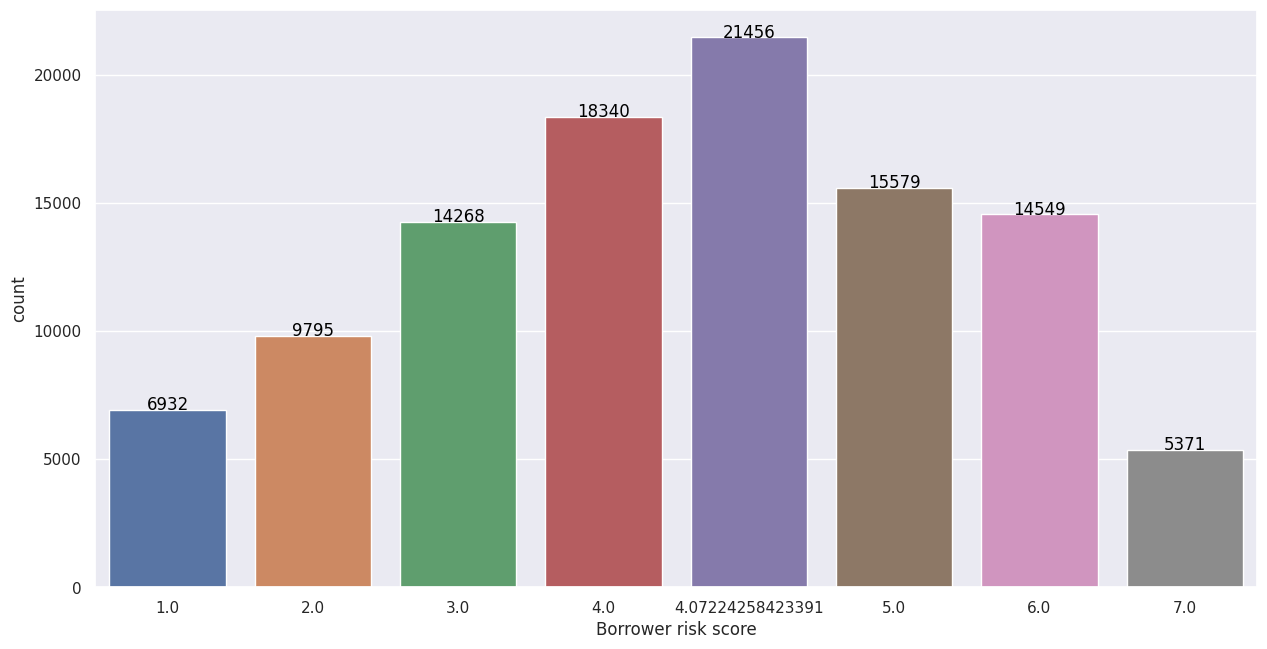

In [ ]:
sns.countplot(data=loan_data, x='ProsperRating (numeric)');
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = loan_data['ProsperRating (numeric)'].value_counts()

for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')





it's +ve skewed which makes sense as higher Debt To Income Ratio shows that the person 
has too much debt for the amount of income. Inversely, lower DebtToIncomeRatio means a 
good balance between debt and income. 
It appears from the figure that most borrowers who applied for 
a loan have a debt to income ratio around 30%.

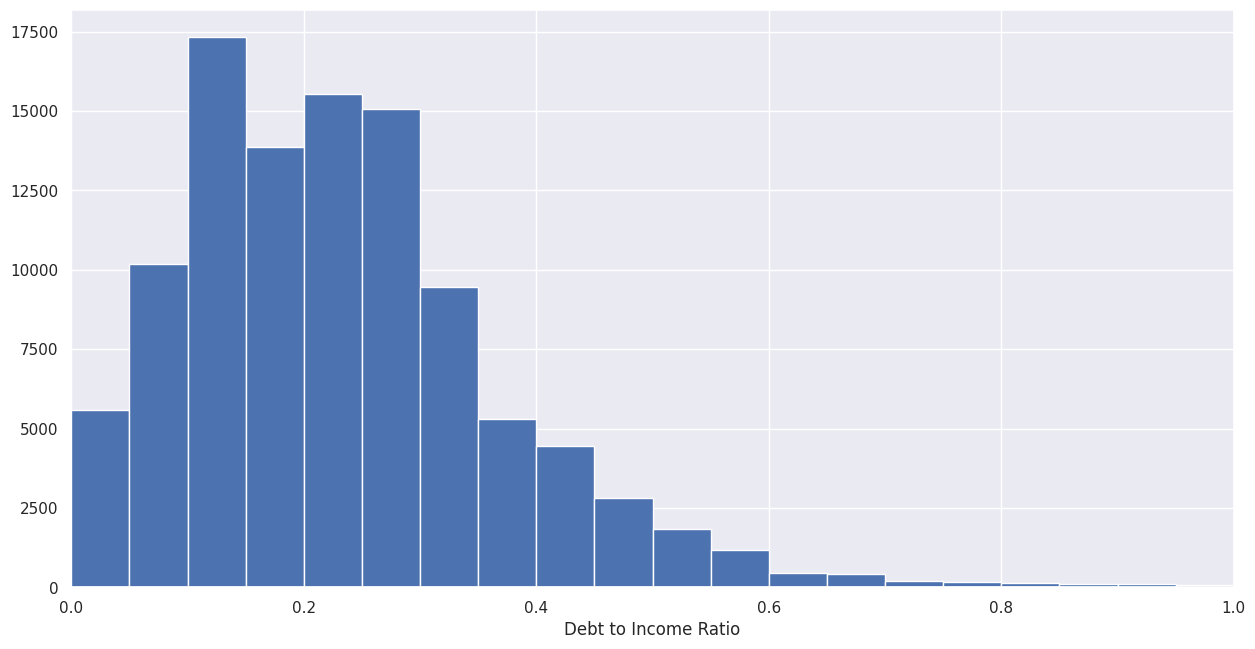

In [ ]:

binsize = 0.05
bins = np.arange(0, loan_data['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_data, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

most of the borrowers are employed which makes sense as it's very hard to get a loan when unemployed

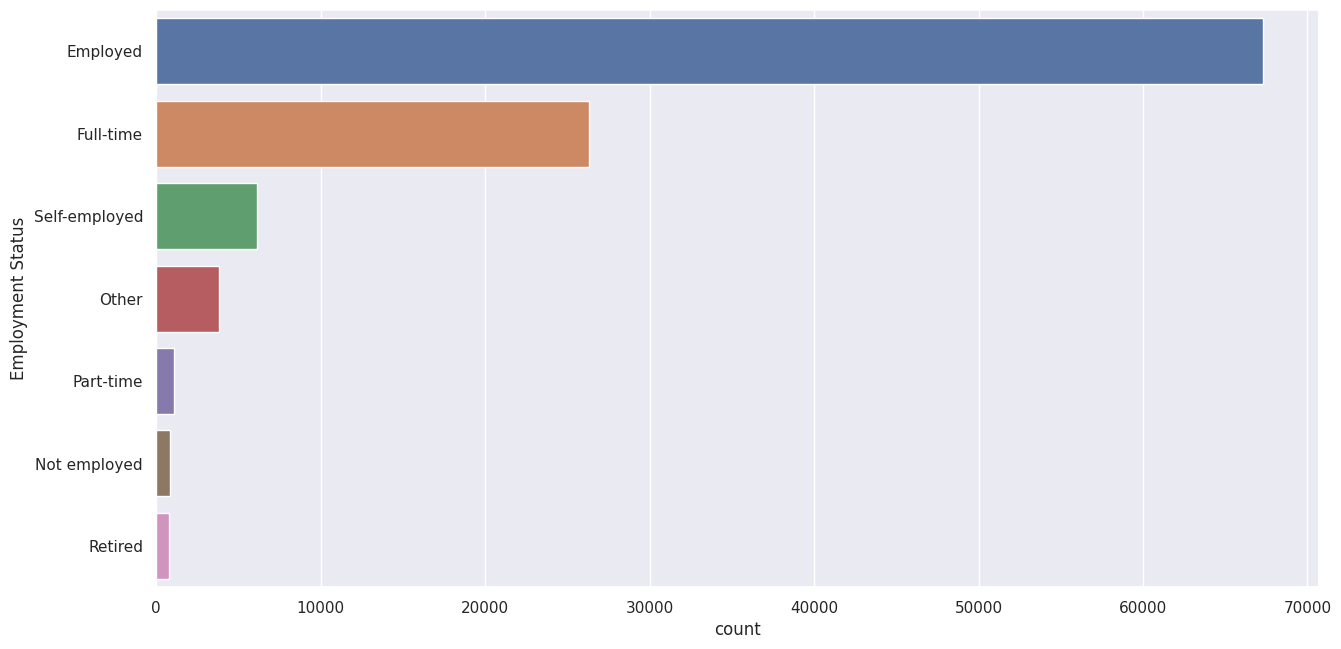

In [ ]:

status_empl=loan_data.EmploymentStatus.value_counts().index
sns.countplot(data=loan_data, y='EmploymentStatus', order=status_empl)
plt.ylabel('Employment Status');

loan purpose by category debt consolidation is the most frequent by much far

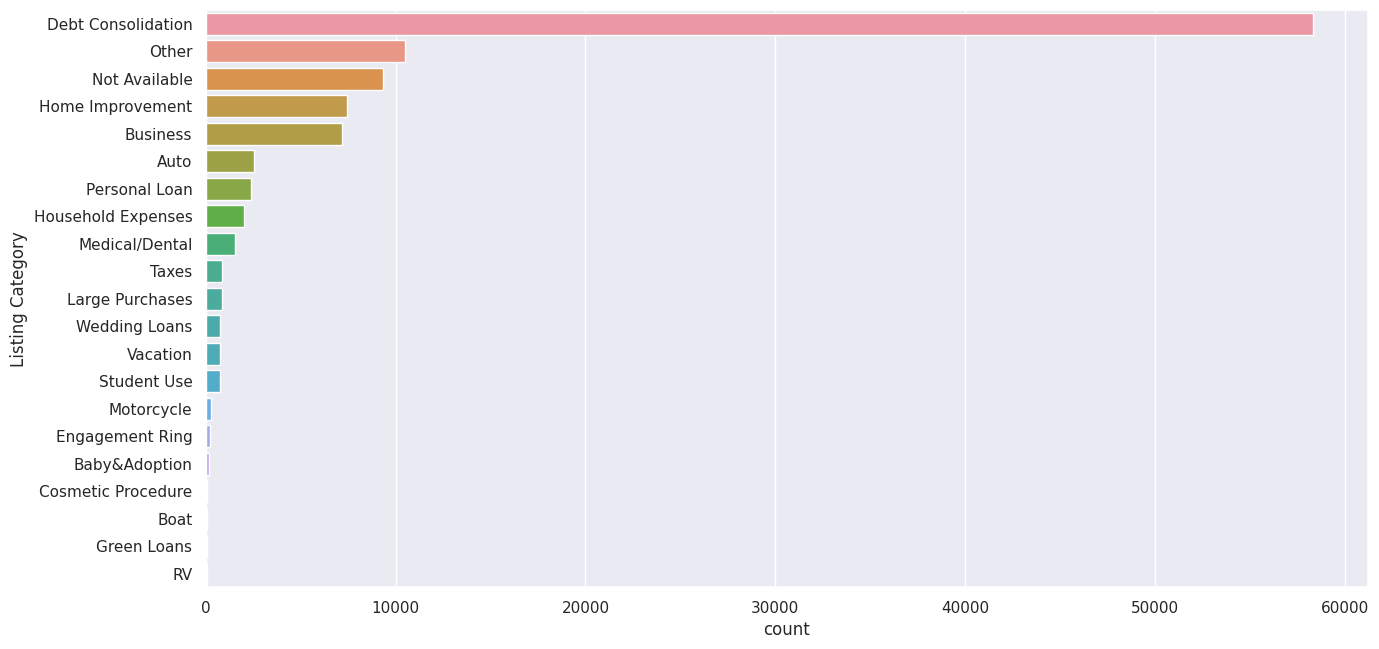

In [ ]:

categ_order = loan_data['ListingCategory'].value_counts().index
listing_counts = loan_data['ListingCategory'].value_counts()
sns.countplot(data = loan_data, y = 'ListingCategory', order=categ_order)
plt.ylabel('Listing Category');

plot the loan original amount against a log scale because it has a long tail.
As we can see, there are three peaks at 4K, 10K, and 15K. 
It seems that these three loan sizes are the most common ones that people took out.

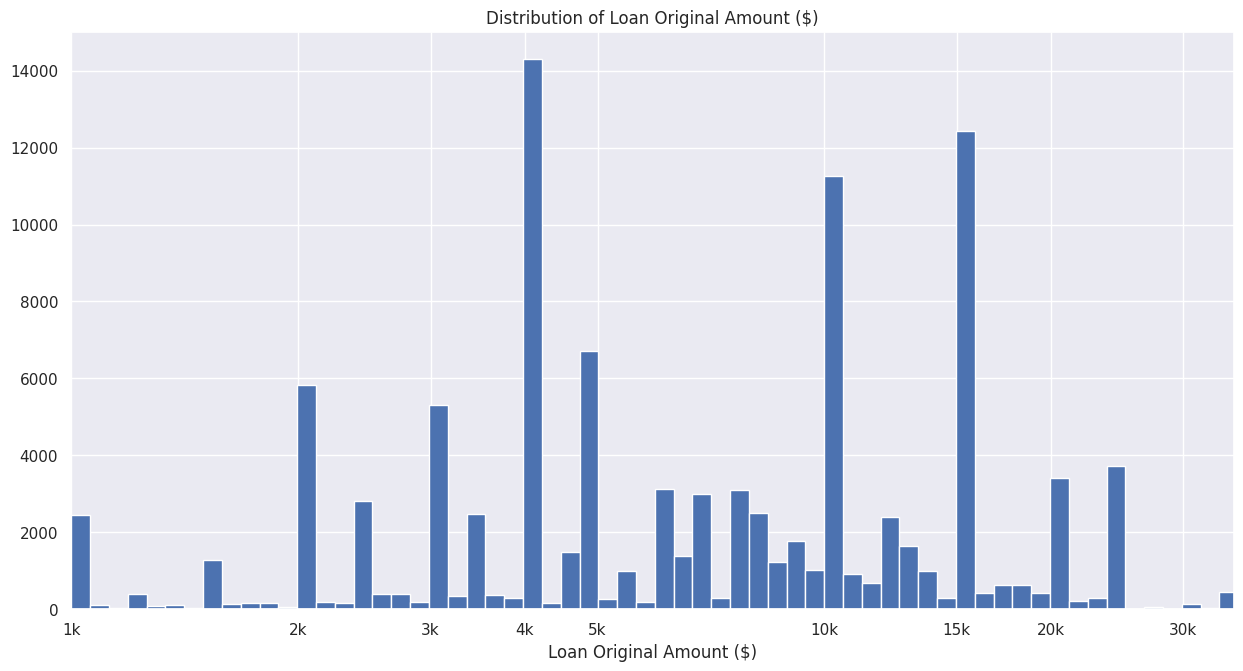

In [ ]:

log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(loan_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

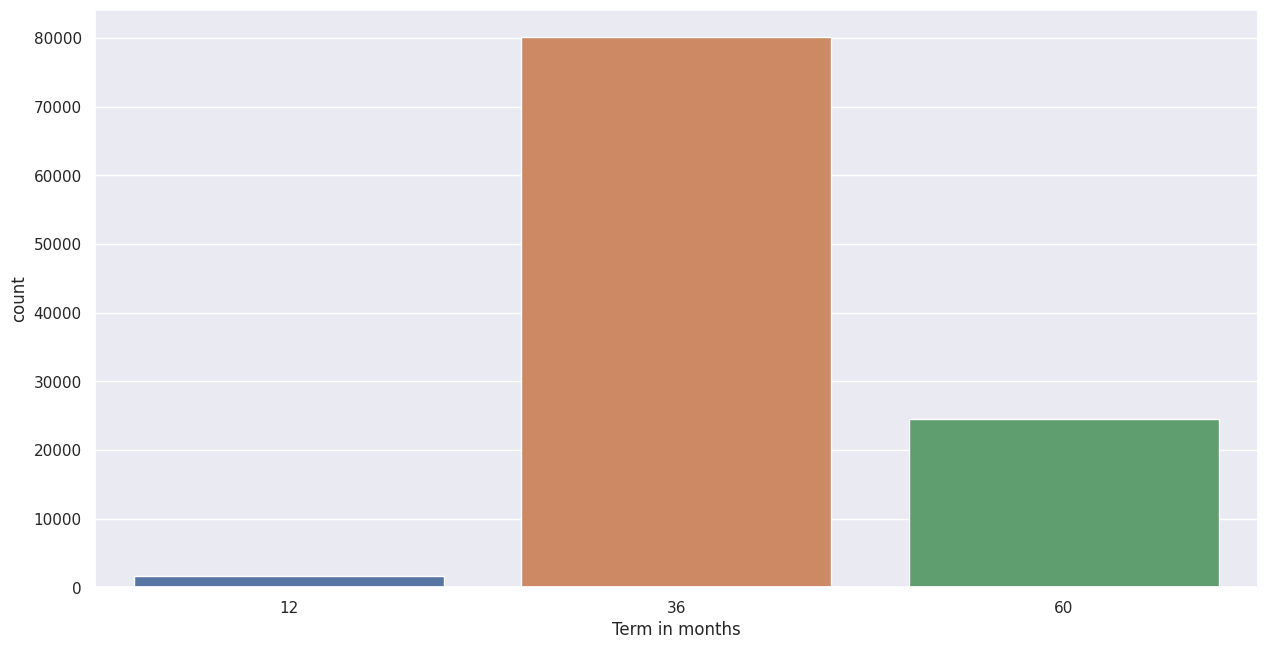

In [ ]:
# Plot term of loans
#most loans are medium term loans 3 years

sns.countplot(data=loan_data, x='Term')
plt.xlabel('Term in months');

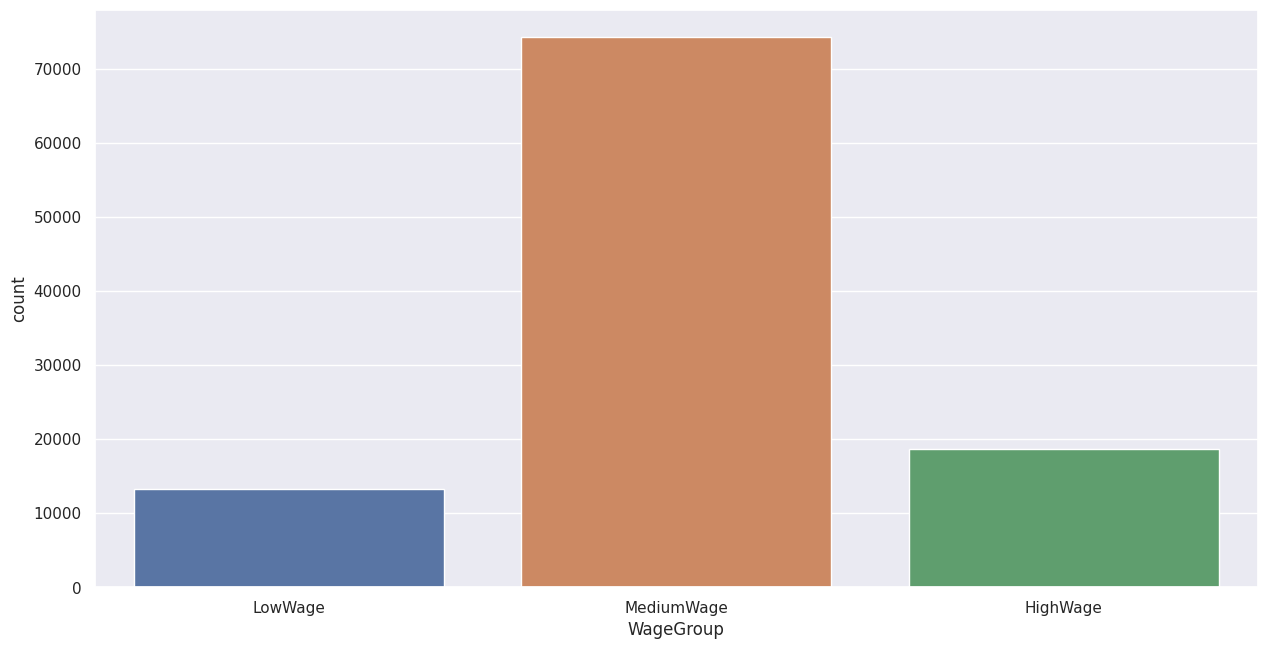

In [ ]:
# define a classification function
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'LowWage'
    if row["StatedMonthlyIncome"]<8000:
        return 'MediumWage'
    else:
        return 'HighWage'
    
loan_data['WageGroup'] = loan_data.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['LowWage', 'MediumWage', 'HighWage']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
loan_data['WageGroup'] = loan_data['WageGroup'].astype(ordered_variabl)

# Plot the new variable
sns.countplot(data = loan_data, x = 'WageGroup');



The majority of people who have taken out credit are in the middle clas and have an average monthly salary between 2500 dollars and 8000 dollars.

To start off with, I want to look at the pairwise correlations present 
between features in the data. I will investigate the relationships between 
numerical variables to see if any particular pairs have strong correlations.


# **Bivariate analysis**

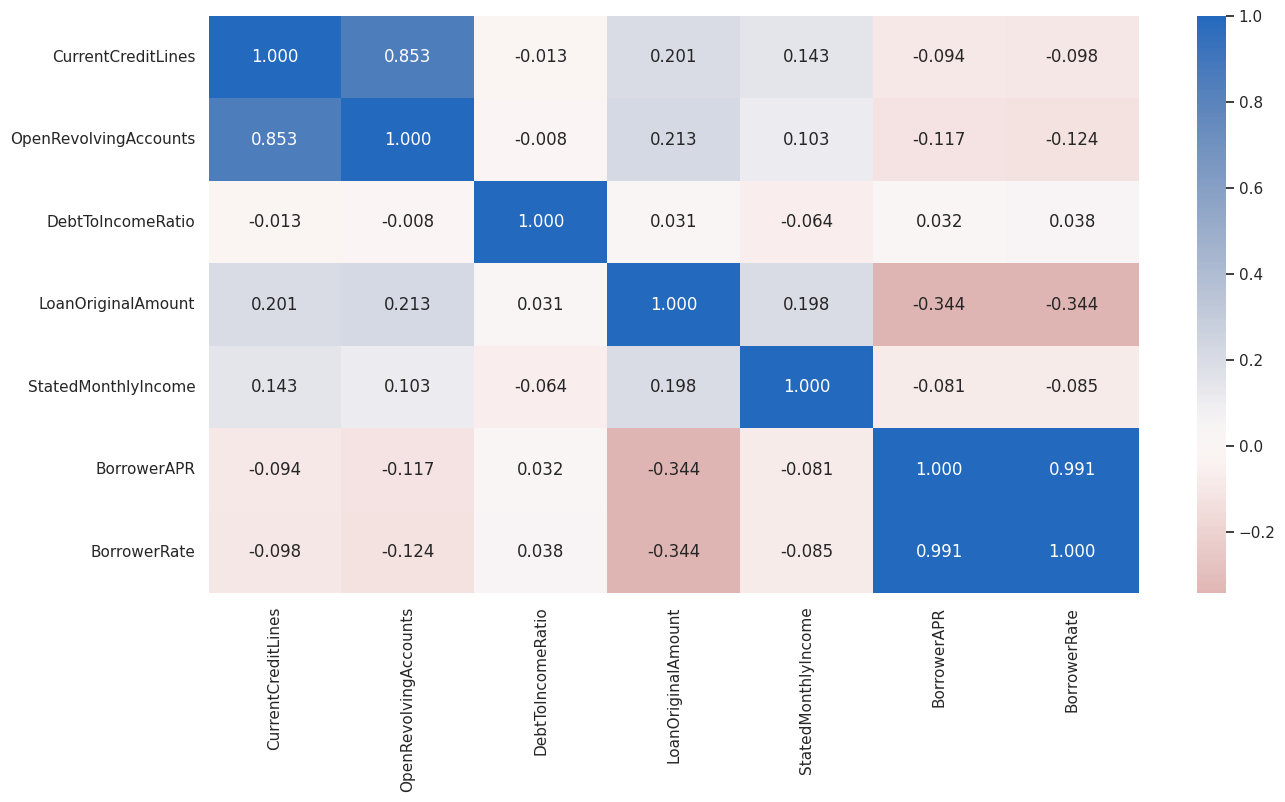

In [ ]:

# Numerical features
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']
# correlation plot
sns.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0)
plt.show()

the CurrentCreditLines and OpenRevolvingAccounts are highly and positively 
correlated with one another .The second strong relationship is between 
BorrowerRate and Borrower APR (correlation coefficient of 0.993).

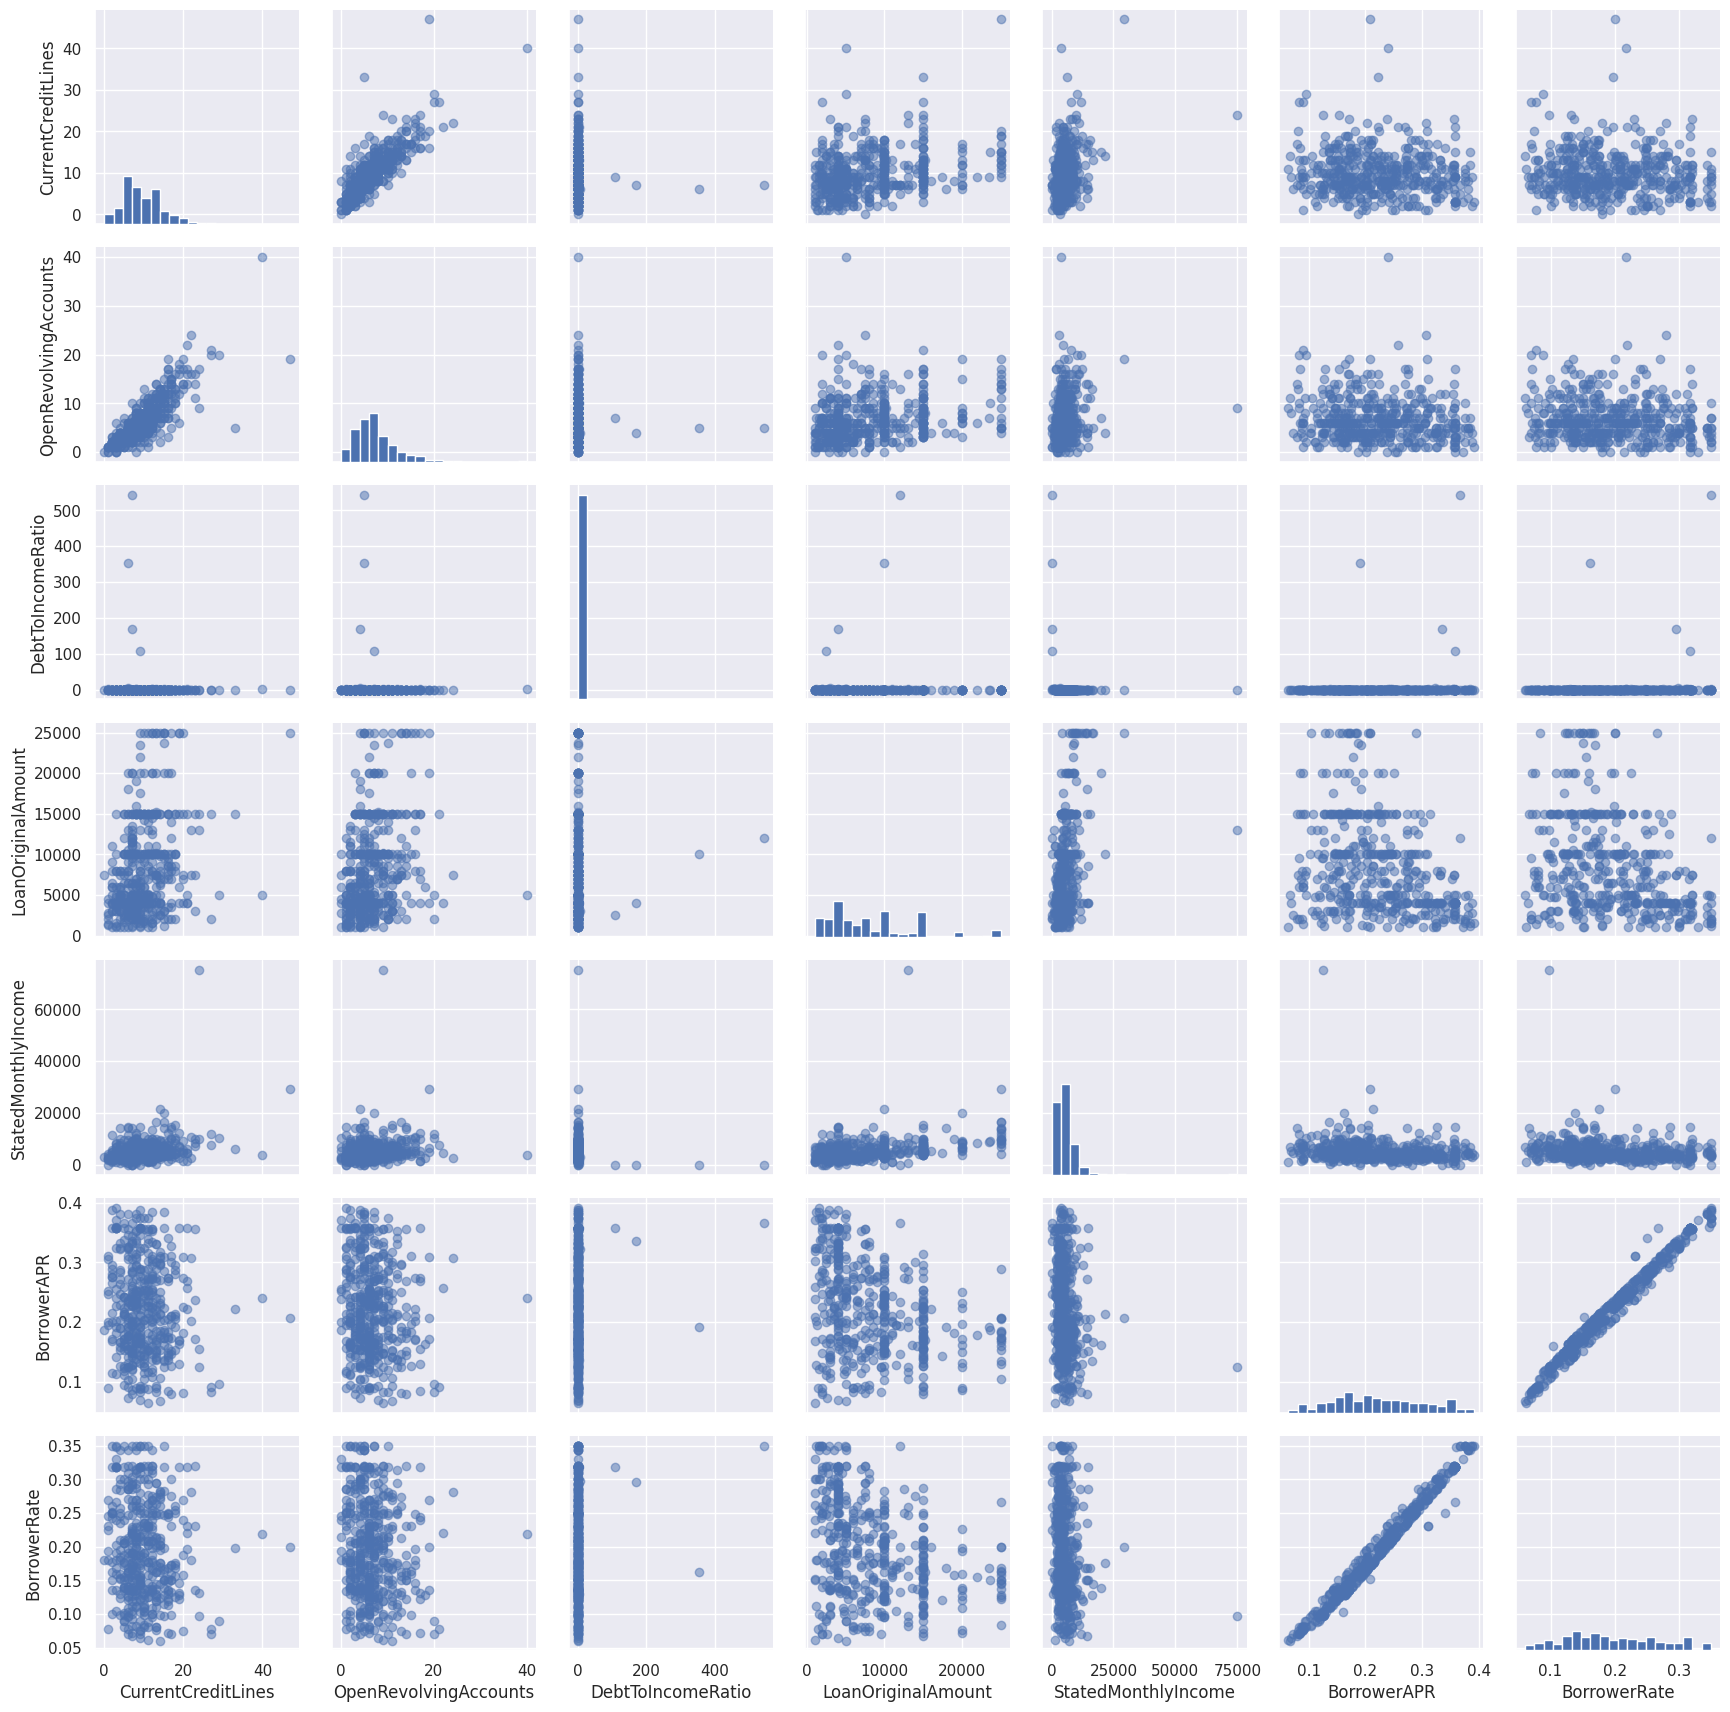

In [ ]:
# plot matrix: sample 500 loans so that plots are clearer
samples = np.random.choice(loan_data.shape[0], 500, replace = False)
df_samp = loan_data.reindex(samples)

# pair grid
g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/2);

In [ ]:
# # plot matrix of numeric features against categorical/ordinal features.
# # use a 2000 sample since there are fewer plots and they're simpler in nature.
# df_samp = loan_data.sample(2000, replace=False)

# #define boxgrid function
# def boxgrid(x, y, **kwargs):
#     default_color = sns.color_palette()[0]
#     sns.boxplot(x, y, color = default_color)
#     plt.xticks(rotation=90);


# g = sns.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = ['EmploymentStatus','IsBorrowerHomeowner','WageGroup'], aspect = 1.5);
# g.map(boxgrid);

Unemployed people have more restrictive credit condition (higher rate) 
than the people who have jobs.
The second observation is that borrowers who have collaterals(or homeowners) have lower rates
than those who doesn't have any collateral (house).
borrowers with higher monthly salaries tend to get a lower lending interest rate.

we have the same notes and insights as above 

In [ ]:
loan_data["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled'],
      dtype=object)

In [ ]:
#Remove current loans as they cannot be counted as good or bad loans
#loan_data_historical= loan_data.copy()

loan_data_historical = loan_data[loan_data["LoanStatus"] != "Current"]
loan_data_historical["LoanStatus"].value_counts()

Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [ ]:
loan_data_historical.shape

(49724, 72)

In [ ]:
#Encode all completed loans as 1, and all delinquent, chargedoff, cancelled and defaulted loans as 0
loan_data_historical["LoanStatus"] = (loan_data_historical["LoanStatus"] == "Completed").astype(int)

# loan_data_historical["LoanStatus"] = np.where(
#     (loan_data_historical["LoanStatus"] == "Completed") | (loan_data_historical["LoanStatus"] == "Current"), 
#     1, 
#     0
# )
loan_data_historical["LoanStatus"][:10]


0     1
11    1
12    0
15    0
21    1
23    0
26    1
27    1
30    1
33    1
Name: LoanStatus, dtype: int64

(0.6743222588689567, 0.3256777411310433)

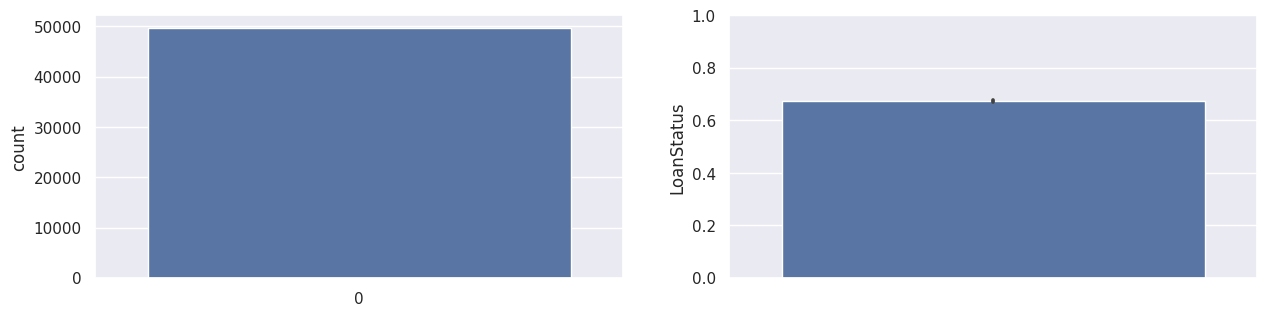

In [ ]:
#showning the probability that the loan is good (paid on time) as 1 or bad (past due or charged off or canceled) as 0
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.countplot(loan_data_historical["LoanStatus"])

ax2 = fig.add_subplot(222)
sns.barplot(y=loan_data_historical["LoanStatus"]).set_ylim([0,1])
loan_data_historical["LoanStatus"].mean(), 1 - loan_data_historical["LoanStatus"].mean()

67.43% of loans are completed. 32.57% of loans "defaulted". (During analysis, one should always bear in mind that default as we've defined it includes charge-offs, cancellations, and even any current loans with late payments. It might be more constructive to think of the loans labelled with a 0 as "bad" loans rather than outright "defaults").

<Axes: xlabel='BorrowerState', ylabel='LoanStatus'>

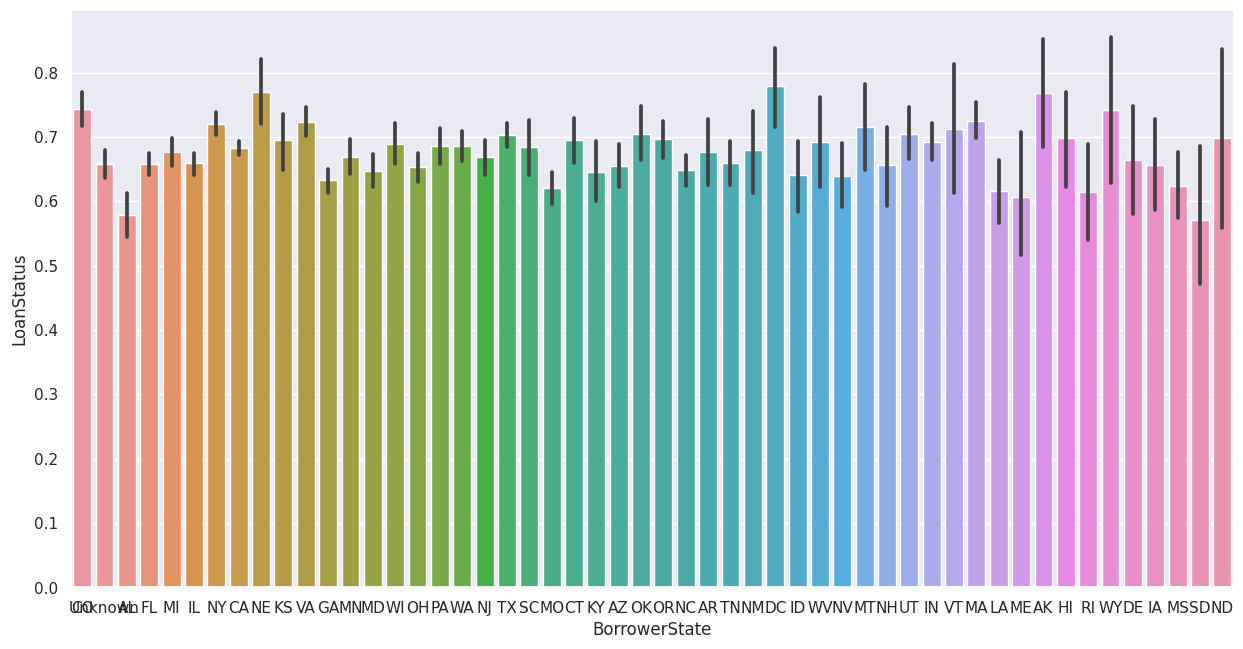

In [ ]:
sns.barplot(x="BorrowerState", y="LoanStatus", data=loan_data_historical)

In [ ]:
al, dc = loan_data_historical[loan_data_historical["BorrowerState"] == "AL"], loan_data_historical[loan_data_historical["BorrowerState"] == "DC"]

1 - al["LoanStatus"].mean(), 1 - dc["LoanStatus"].mean()


(0.42205323193916355, 0.22043010752688175)

Loans to people in Alabama defaulted 42.21% of the time, whereas loans to people 
in Washington D.C. only defaulted 22.04% of the time. 


<Axes: xlabel='ListingCategory', ylabel='LoanStatus'>

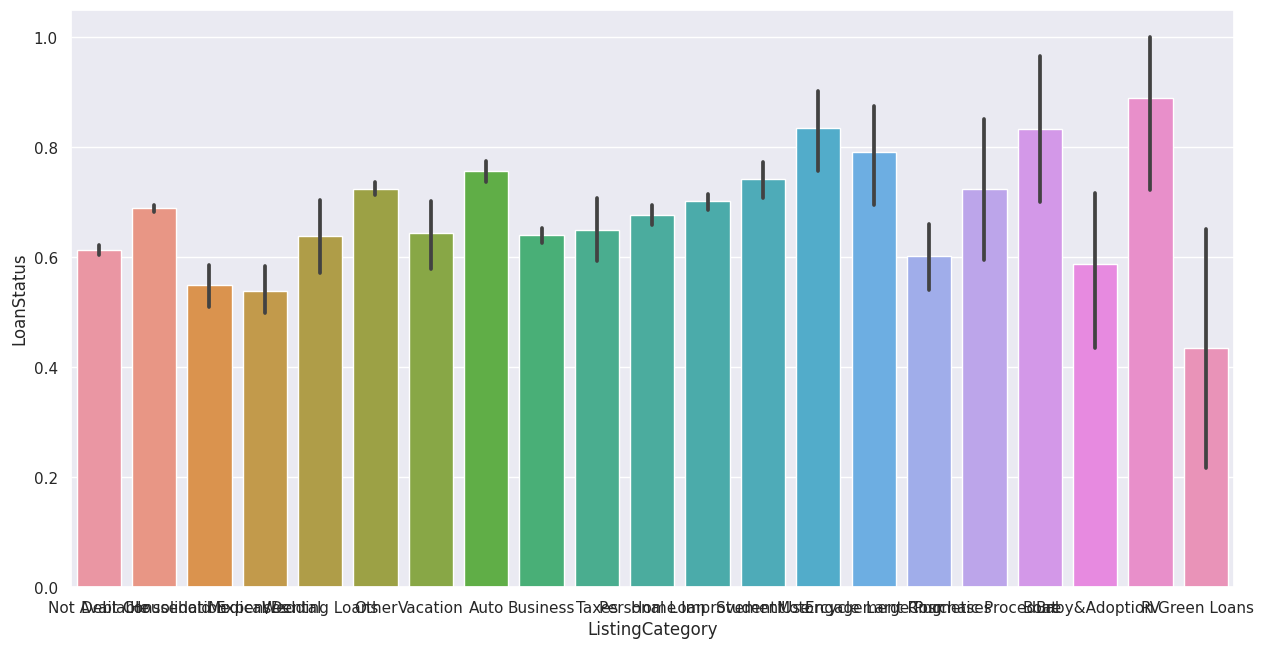

In [ ]:
sns.barplot(x="ListingCategory", y="LoanStatus", data=loan_data_historical)

In [ ]:
rv, green = loan_data_historical[loan_data_historical["ListingCategory"] == "RV"], loan_data_historical[loan_data_historical["ListingCategory"] == "Green Loans"]

1 - rv["LoanStatus"].mean(), 1 - green["LoanStatus"].mean()

(0.11111111111111116, 0.5652173913043479)

with RV loans only defaulting 11.11% of the time, and green loans defaulting 
56.52% of the time. Other frequent defaulters are loans for household expenses 
and for medical and dental work, while people seem to completely pay boat and motorcycle loans quite frequently.

<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

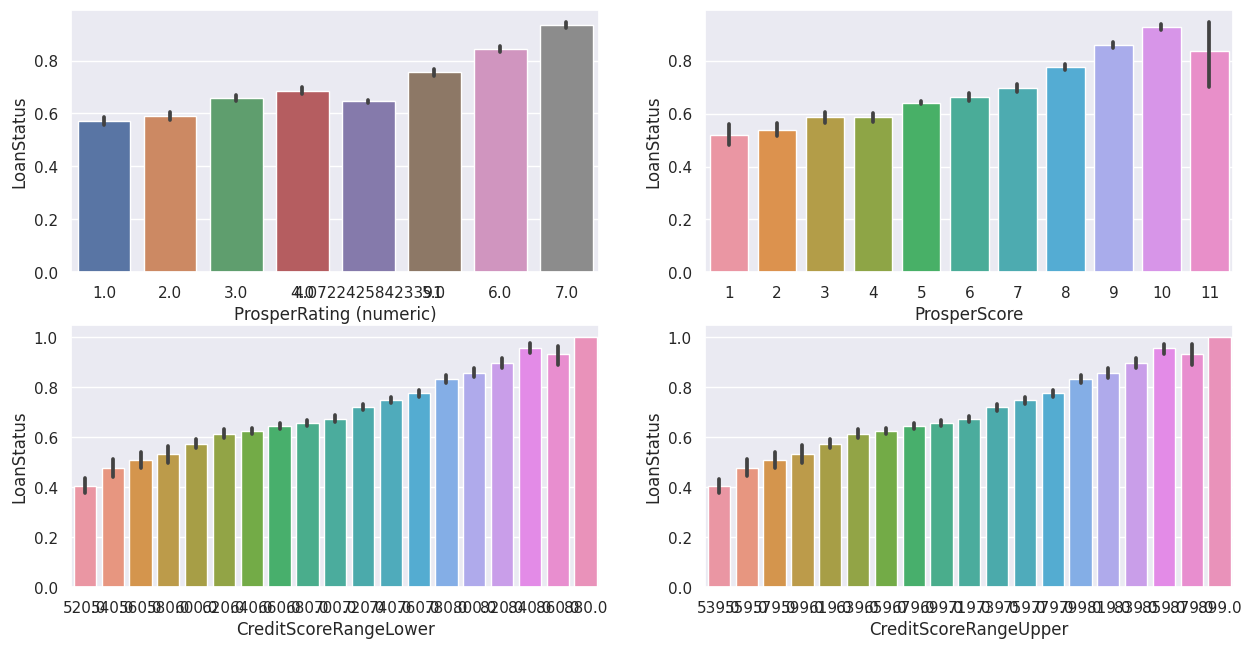

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="ProsperRating (numeric)", y="LoanStatus", data=loan_data_historical)

ax2 = fig.add_subplot(222)
sns.barplot(x="ProsperScore", y="LoanStatus", data=loan_data_historical)

ax3 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=loan_data_historical)

ax4 = fig.add_subplot(224)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=loan_data_historical)

Prosper scores and the credit scores are doing a good job of predicting default, with higher ratings defaulting less frequently. 
Interestingly, the loans with the highest ProsperScores (11) default more frequently than loans rated at a 9 or a 10, 
and there is a high degree of variance in default rate for those highly rated loans.

It should be noted here that the credit score "range" seems to be constant. 
So let's quickly double-check that, and remove the redundancy by 
dropping CreditScoreRangeUpper and renaming the lower bound "CreditScore".

In [ ]:
credit_score_range = loan_data_historical["CreditScoreRangeUpper"] - loan_data_historical["CreditScoreRangeLower"]

credit_score_range.value_counts()

19.0    49724
dtype: int64

In [ ]:
loan_data_historical.drop("CreditScoreRangeUpper", axis=1, inplace=True)

loan_data_historical.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

(0.0, 400.0)

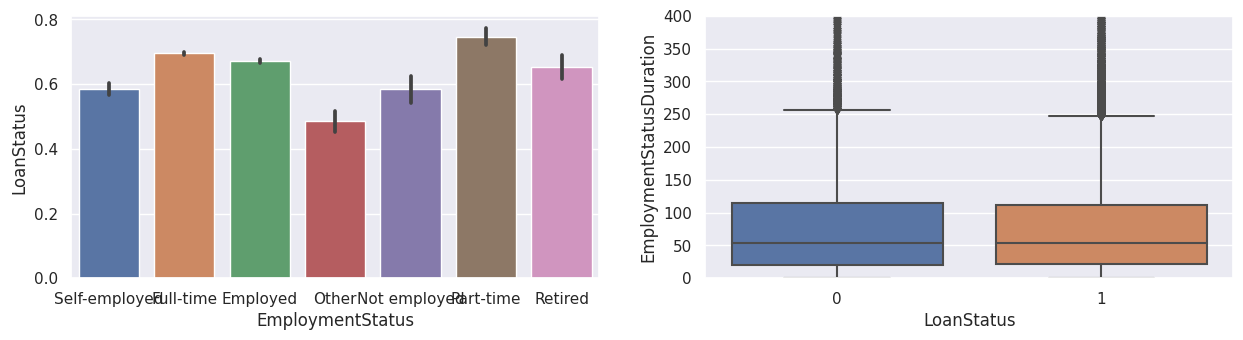

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data=loan_data_historical)

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="EmploymentStatusDuration", data=loan_data_historical).set_ylim([0,400])

In [ ]:
#no clear relation 

In [ ]:
x = loan_data_historical["EmploymentStatusDuration"]
y = loan_data_historical["LoanStatus"]

r, p = st.pearsonr(x, y)

print("The correlation between employment status duration and loan default is {}, with a p-value of {}".format(r, p))

The correlation between employment status duration and loan default is -0.005905702858997271, with a p-value of 0.18787754221205183


The very weak correlation between employment status duration and loan default,
as well as the lack of a statistically significant p-value, lead me to believe that we can safely drop this variable from our dataset.

In [ ]:

loan_data_historical.drop("EmploymentStatusDuration", axis=1, inplace=True)

(0.0, 0.8)

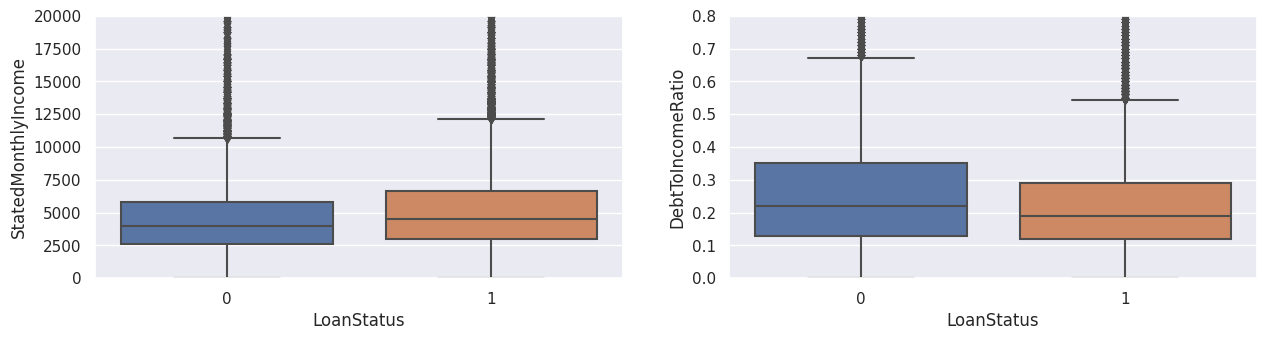

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=loan_data_historical).set_ylim([0,20000])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=loan_data_historical).set_ylim([0,0.8])

People with higher stated incomes defaulted less often than those with lower 
incomes, regardless of the size of the loan. And as is intuitive, 
loans are more likely to default if the ratio of debt to income is higher.

(0.0, 2.5)

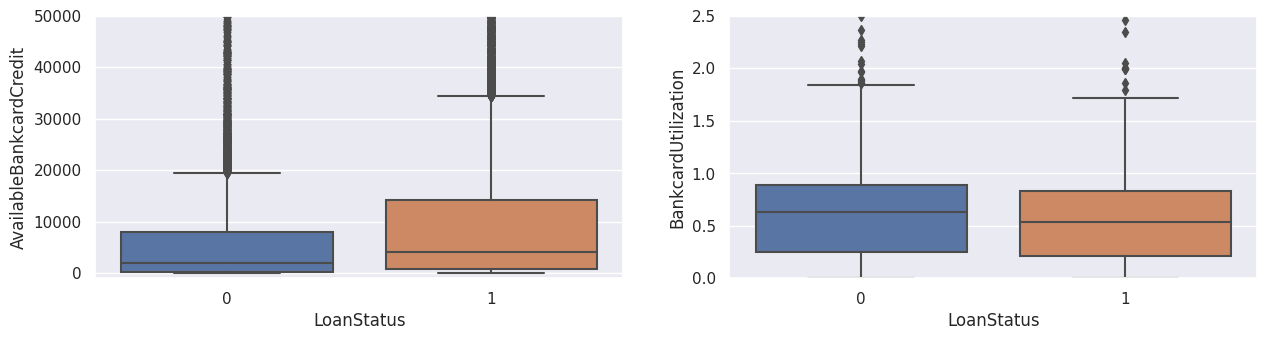

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="AvailableBankcardCredit", data=loan_data_historical).set_ylim([-1000, 50000])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="BankcardUtilization", data=loan_data_historical).set_ylim([0,2.5])

the availability of bankcard credit goes with completed loans, 
and the lower the proportion of bankcard utilization, 
the lower the likelihood of default.

(0.0, 1.0)

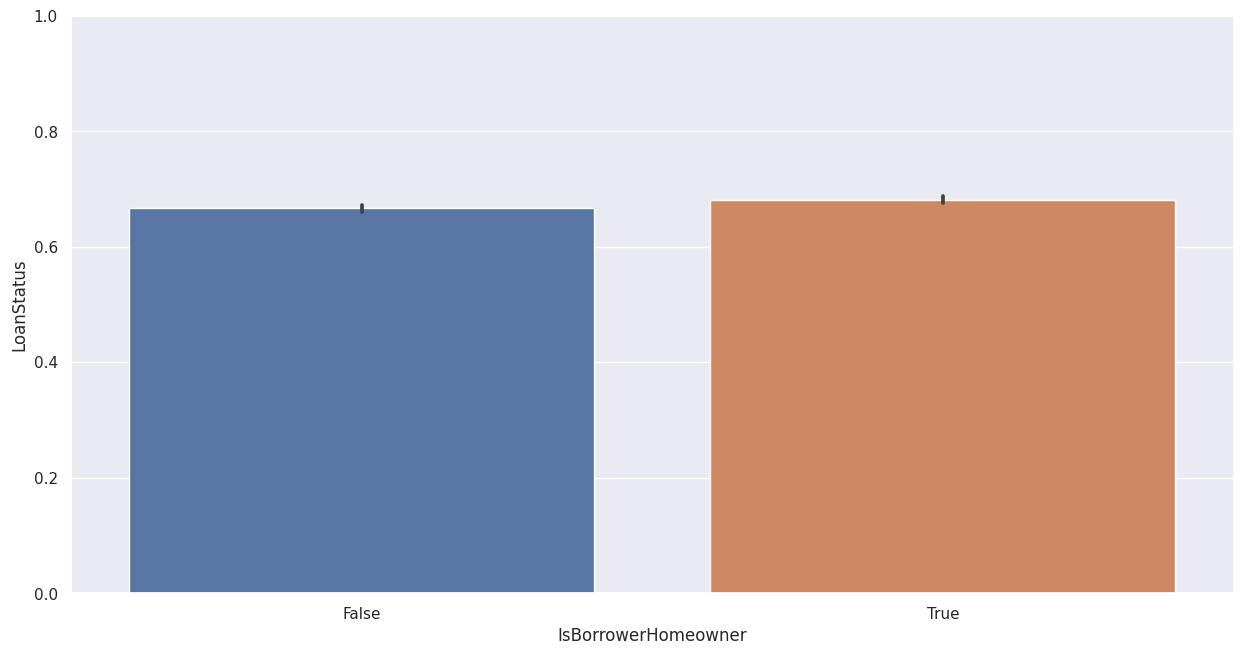

In [ ]:
sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=loan_data_historical).set_ylim([0,1])

no sagnificant relation

(0.0, 20.0)

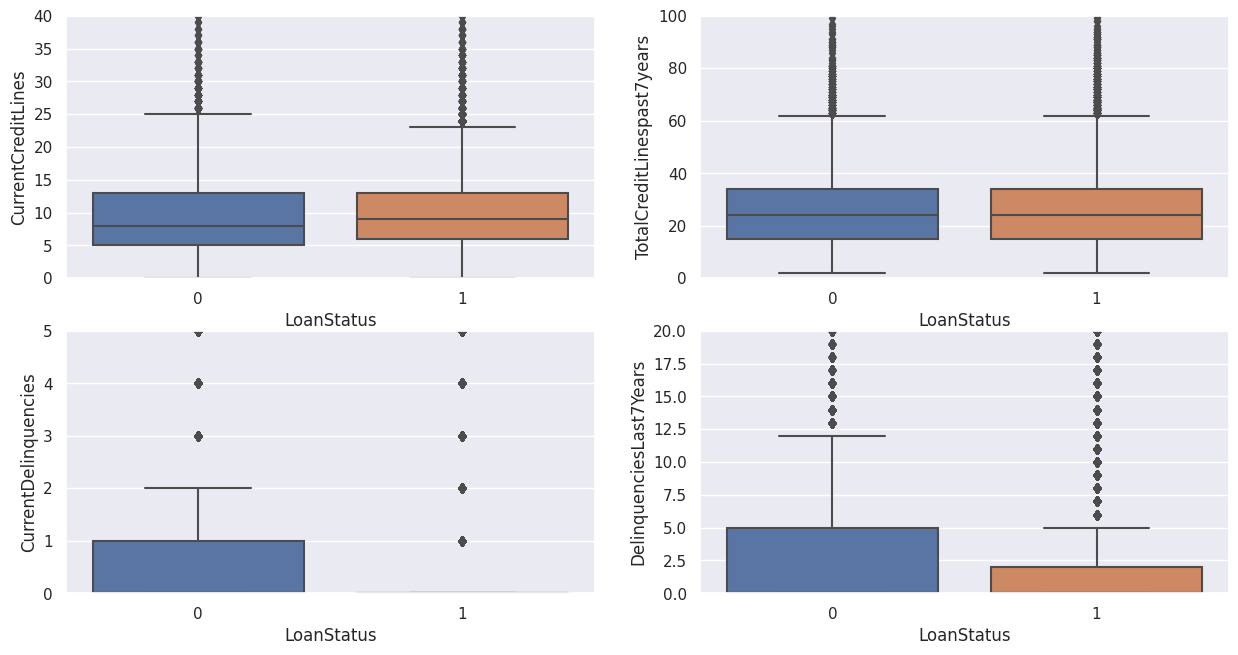

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="CurrentCreditLines", data=loan_data_historical).set_ylim([0,40])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="TotalCreditLinespast7years", data=loan_data_historical).set_ylim([0,100])

ax3 = fig.add_subplot(223)
sns.boxplot(x="LoanStatus", y="CurrentDelinquencies", data=loan_data_historical).set_ylim([0,5])

ax4 = fig.add_subplot(224)
sns.boxplot(x="LoanStatus", y="DelinquenciesLast7Years", data=loan_data_historical).set_ylim([0,20])

Number of credit lines doesn't seem to have a particularly significant 
relationship with default, but delinquencies do. 
Among loans that were completed, it is very rare for the debtor to 
have any current delinquencies. Likewise, a history of delinquency seems 
to indicate a propensity for default.

In [ ]:
delinquency = ["CurrentDelinquencies", "DelinquenciesLast7Years"]
y = loan_data_historical["LoanStatus"]

for var in delinquency:
    x = loan_data_historical[var]
    r, p = st.pearsonr(x, y)

    print("The correlation between {} and loan default is {}, with a p-value of {}".format(var, r, p))

The correlation between CurrentDelinquencies and loan default is -0.12107063477741868, with a p-value of 1.084524265126135e-161
The correlation between DelinquenciesLast7Years and loan default is -0.06975250066577968, with a p-value of 1.1176410320847148e-54


Both current and historical delinquency correlate significantly (p < 0.05) with loan status. Current delinquencies in particular should be a very strong feature for us.

(10.0, 60.0)

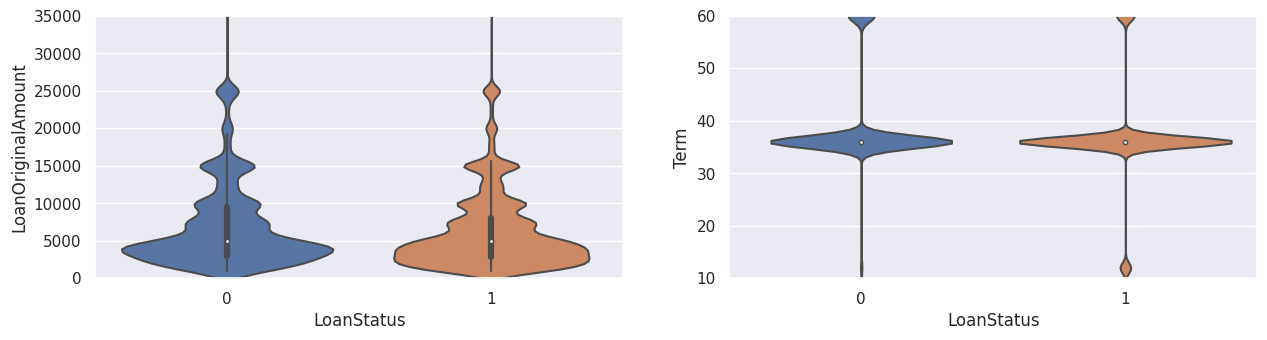

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.violinplot(x="LoanStatus", y="LoanOriginalAmount", data=loan_data_historical).set_ylim([0,35000])

ax2 = fig.add_subplot(222)
sns.violinplot(x="LoanStatus", y="Term", data=loan_data_historical).set_ylim([10, 60])

no clear insight

<Axes: xlabel='BorrowerRate', ylabel='Density'>

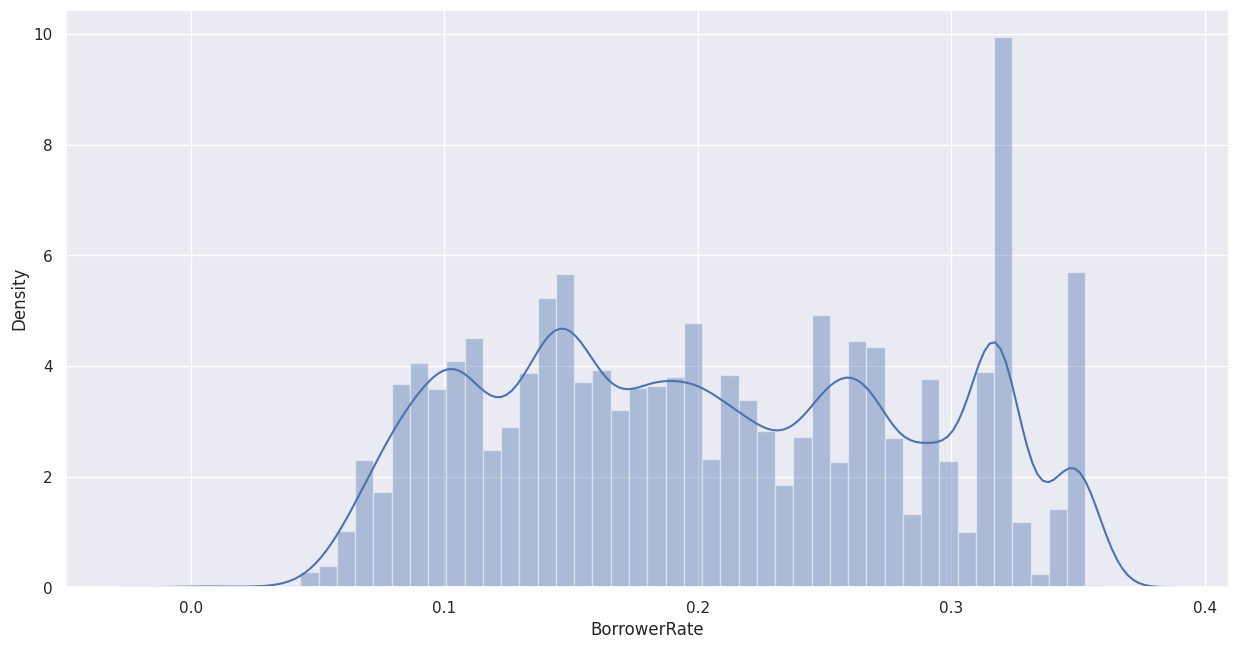

In [ ]:
sns.distplot(loan_data_historical["BorrowerRate"])

In [ ]:
loan_data_historical["BorrowerRate"].describe()

count    49724.000000
mean         0.203470
std          0.082468
min          0.000000
25%          0.136400
50%          0.199000
75%          0.270000
max          0.360000
Name: BorrowerRate, dtype: float64

the mean is 20.3% and var is 8.2%
meaning that the range is between 12% and 28%

most loans that are defaulted have higher rates than the one which are paid for all credit scores



# **Multivariate analysis**

<Axes: xlabel='CreditScore', ylabel='BorrowerRate'>

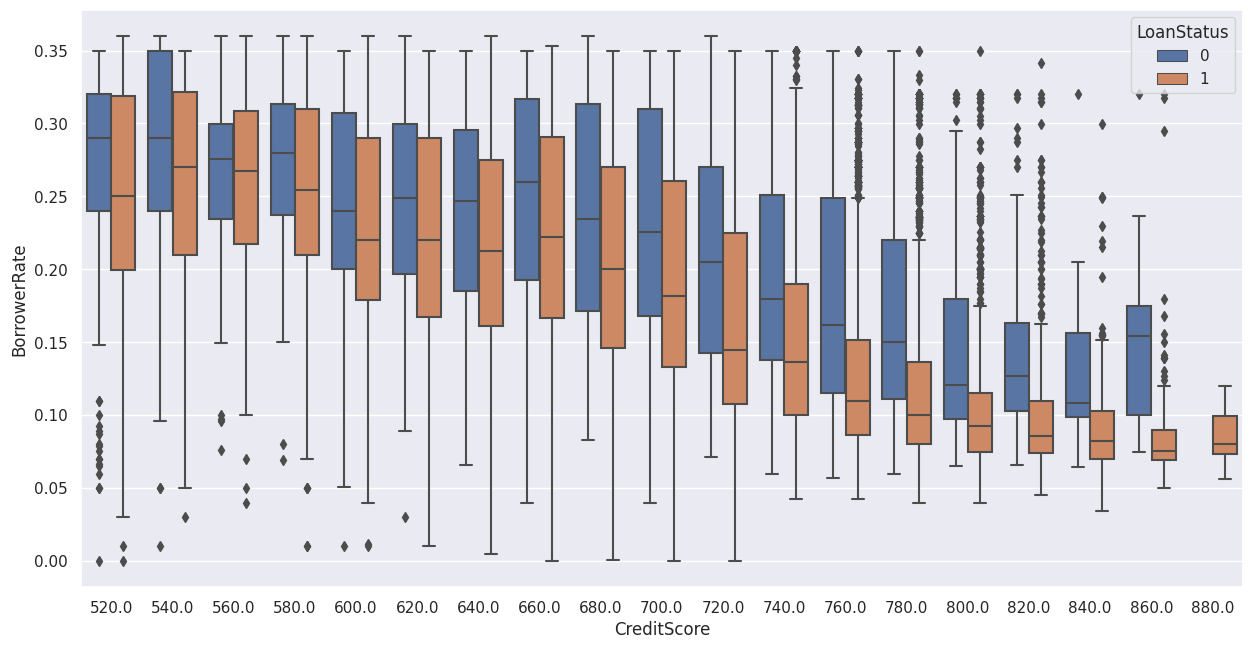

In [ ]:
sns.boxplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=loan_data_historical)

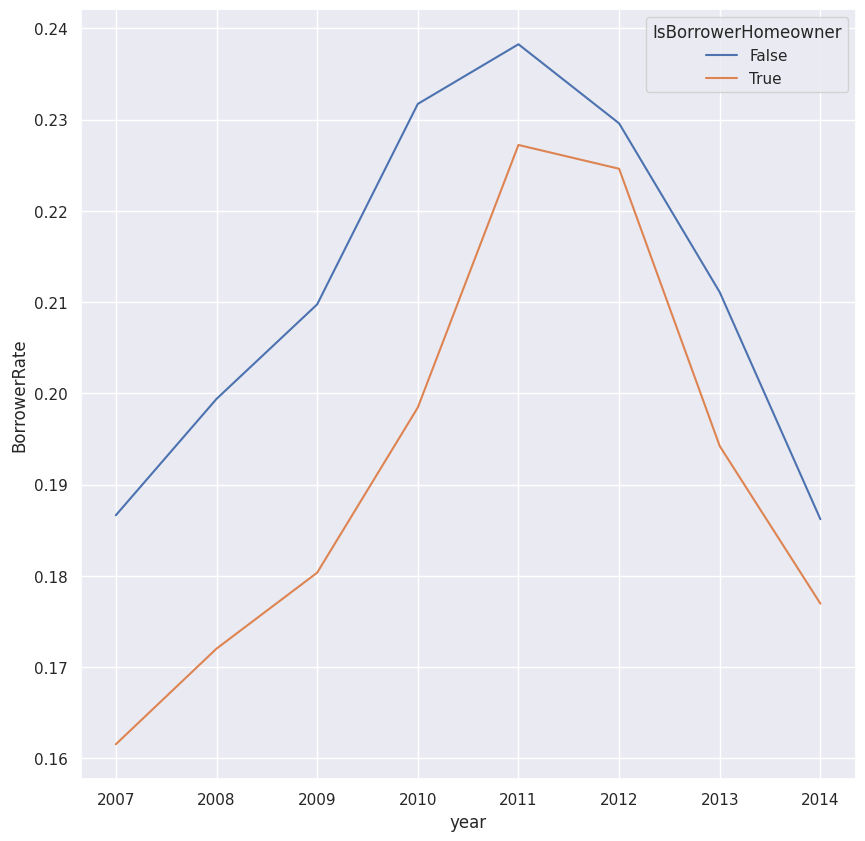

In [ ]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
g=sns.lineplot(data=loan_data_historical, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner',ci=None);


As expected, rates for individuals with collateral(homeowner) are lower than those without collateral, but the gap between the two rates has decreased significantly since 2011.

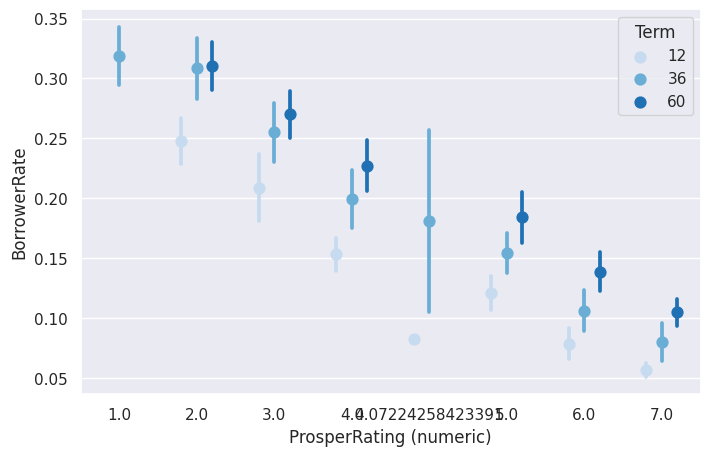

In [ ]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = loan_data_historical, x = 'ProsperRating (numeric)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')

The rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the 2 rating (same rates for 3 and 5 years loans ) and the 1 rating). This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating. Interestingly, for 1 rating, only 3 years loans are observed in this dataset.

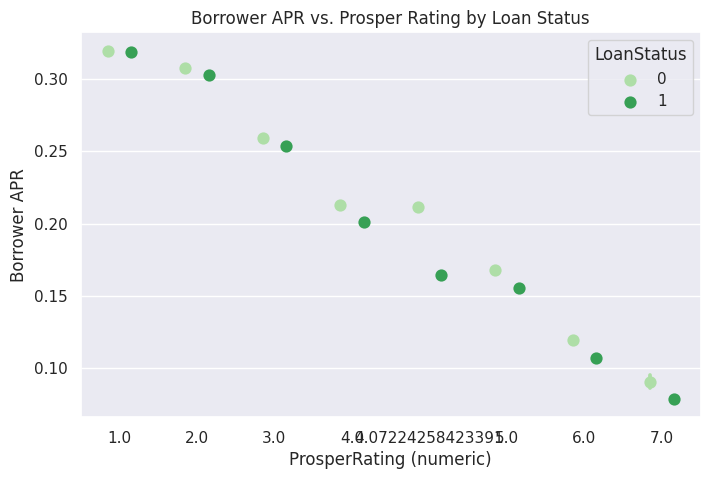

In [ ]:
fig = plt.figure(figsize = [8,5])
ax = sns.pointplot(data = loan_data_historical, x = 'ProsperRating (numeric)', y = 'BorrowerRate', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Borrower APR vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower APR')
plt.show();

For all Prosper Ratings except for 1, Defaulted and charged off loans usually have a higher Borrower Rate compared to completed loans(good records).

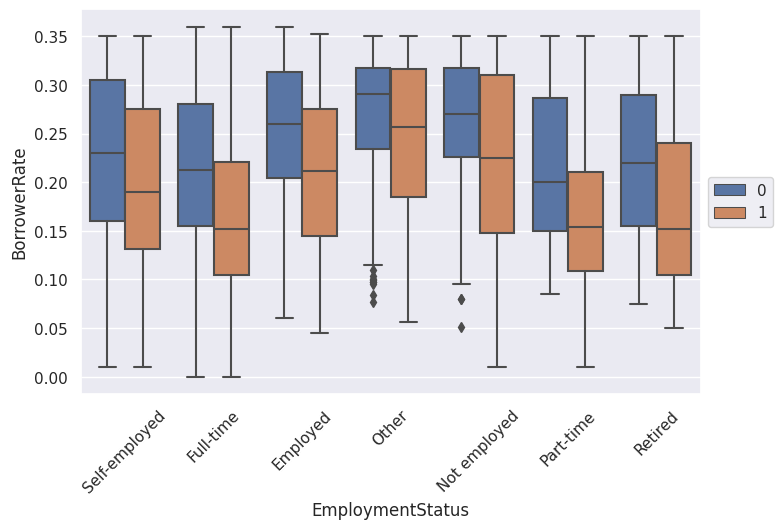

In [ ]:
plt.figure(figsize=[8, 5])
sns.boxplot(data=loan_data_historical,x='EmploymentStatus',y='BorrowerRate',hue='LoanStatus',dodge=0.3);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

figure confirmes that applied borrower rate is higher for unemployed people and delinquent loans( loans with bad records).

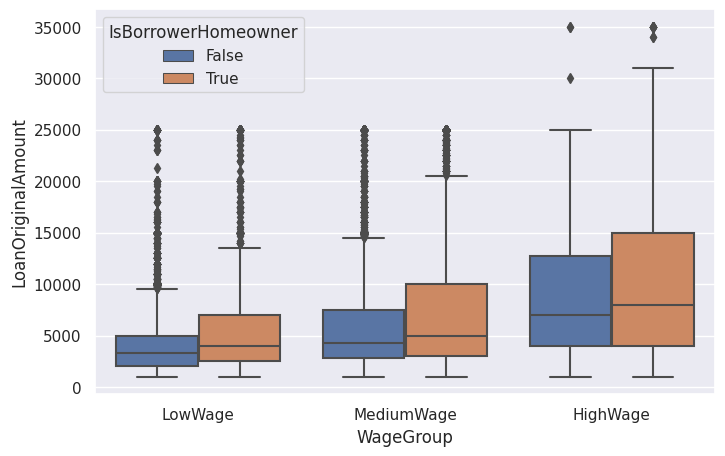

In [ ]:
#plot boxplot
plt.figure(figsize = [8,5])
sns.boxplot(data = loan_data_historical, x = 'WageGroup', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner');

As shown in the previous section, having a collateral and a higher wage help getting higher loan amount. It is clearly visible that being a home owner is a very important element to get a higher loan amount.

In [ ]:
loan_data_historical["EmploymentStatus"] = ((loan_data_historical["EmploymentStatus"] == "Employed") | (loan_data_historical["EmploymentStatus"] =="Full-time") |( loan_data_historical["EmploymentStatus"] =="Part-time") | (loan_data_historical["EmploymentStatus"] =="Self-employed")).astype(int)

loan_data_historical["EmploymentStatus"][:10]

0     1
11    1
12    1
15    0
21    1
23    1
26    1
27    1
30    1
33    1
Name: EmploymentStatus, dtype: int64

# **Feature Engineering**

it's safe to drop the PercentFunded variable. BorrowerAPR and LenderYield 
are both versions of BorrowerRate, just with fees included, so they're unnecessary.
occupation is a broad and hard to use column
the estimation are unnecessary as it's our role to perform better than them


In [ ]:
loan_data_historical.drop([ "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
                  "Occupation", "CurrentlyInGroup", "GroupKey", "PercentFunded","ProsperRating (numeric)",
                  "Recommendations", "InvestmentFromFriendsCount", "InvestmentFromFriendsAmount",
                  "date" , "TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments",
                  "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                  "ProsperPrincipalOutstanding","ListingKey","ListingCategory (numeric)","ListingCategory"
                ,'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years'], axis=1,
                inplace=True)

loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   CreditGrade                         49724 non-null  object  
 1   Term                                49724 non-null  int64   
 2   LoanStatus                          49724 non-null  int64   
 3   BorrowerAPR                         49724 non-null  float64 
 4   BorrowerRate                        49724 non-null  float64 
 5   LenderYield                         49724 non-null  float64 
 6   ProsperScore                        49724 non-null  int64   
 7   BorrowerState                       49724 non-null  object  
 8   EmploymentStatus                    49724 non-null  int64   
 9   IsBorrowerHomeowner                 49724 non-null  bool    
 10  CreditScore                         49724 non-null  float64 
 11  FirstRecordedCreditLine         

In [ ]:
loan_data_historical.drop(["TradesOpenedLast6Months","PublicRecordsLast10Years","PublicRecordsLast12Months",], axis=1,
                inplace=True)

loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   CreditGrade                         49724 non-null  object  
 1   Term                                49724 non-null  int64   
 2   LoanStatus                          49724 non-null  int64   
 3   BorrowerAPR                         49724 non-null  float64 
 4   BorrowerRate                        49724 non-null  float64 
 5   LenderYield                         49724 non-null  float64 
 6   ProsperScore                        49724 non-null  int64   
 7   BorrowerState                       49724 non-null  object  
 8   EmploymentStatus                    49724 non-null  int64   
 9   IsBorrowerHomeowner                 49724 non-null  bool    
 10  CreditScore                         49724 non-null  float64 
 11  FirstRecordedCreditLine         

In [ ]:
#adjusting the data types
loan_data_historical["IsBorrowerHomeowner"] = loan_data_historical["IsBorrowerHomeowner"].astype(int)


loan_data_historical["IsBorrowerHomeowner"][:10]

0     1
11    0
12    0
15    1
21    0
23    0
26    0
27    1
30    0
33    0
Name: IsBorrowerHomeowner, dtype: int64

In [ ]:
first_credit_year = loan_data_historical["FirstRecordedCreditLine"].str[:4]

loan_data_historical["YearsWithCredit"] = 2014 - pd.to_numeric(first_credit_year)

loan_data_historical.drop("FirstRecordedCreditLine", axis=1, inplace=True)

loan_data_historical["YearsWithCredit"][:10]

0     13
11    14
12    18
15    15
21    11
23    16
26    39
27    14
30    26
33    11
Name: YearsWithCredit, dtype: int64

In [ ]:
loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   CreditGrade                         49724 non-null  object  
 1   Term                                49724 non-null  int64   
 2   LoanStatus                          49724 non-null  int64   
 3   BorrowerAPR                         49724 non-null  float64 
 4   BorrowerRate                        49724 non-null  float64 
 5   LenderYield                         49724 non-null  float64 
 6   ProsperScore                        49724 non-null  int64   
 7   BorrowerState                       49724 non-null  object  
 8   EmploymentStatus                    49724 non-null  int64   
 9   IsBorrowerHomeowner                 49724 non-null  int64   
 10  CreditScore                         49724 non-null  float64 
 11  CurrentCreditLines              

In [ ]:
# state_defaults = loan_data_historical.groupby("BorrowerState")["LoanStatus"].mean()

# vlow_risk = sorted(state_defaults)[51]
# low_risk = sorted(state_defaults)[40]
# mid_risk = sorted(state_defaults)[29]
# high_risk = sorted(state_defaults)[19]
# vhigh_risk = sorted(state_defaults)[9]

# new_geography = {}

# for state in state_defaults.index:
#     if high_risk > state_defaults[state]:
#         v = 5
#     elif mid_risk > state_defaults[state] >= high_risk:
#         v = 4
#     elif low_risk > state_defaults[state] >= mid_risk:
#         v = 3
#     elif vlow_risk > state_defaults[state] >= low_risk:
#         v = 2
#     else:
#         v = 1
#     new_geography[state] = v

# loan_data_historical.replace(to_replace={"BorrowerState": new_geography}, inplace=True)
                               
# loan_data_historical["BorrowerState"][:10]
loan_data_historical.drop(["BorrowerState"],inplace=True, axis=1)


In [ ]:
state = pd.get_dummies(loan_data_historical["WageGroup"])

loan_data_historical = loan_data_historical.join(state, rsuffix="_group")
loan_data_historical.drop("WageGroup", axis=1, inplace=True)

loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49724 non-null  object 
 1   Term                                49724 non-null  int64  
 2   LoanStatus                          49724 non-null  int64  
 3   BorrowerAPR                         49724 non-null  float64
 4   BorrowerRate                        49724 non-null  float64
 5   LenderYield                         49724 non-null  float64
 6   ProsperScore                        49724 non-null  int64  
 7   EmploymentStatus                    49724 non-null  int64  
 8   IsBorrowerHomeowner                 49724 non-null  int64  
 9   CreditScore                         49724 non-null  float64
 10  CurrentCreditLines                  49724 non-null  float64
 11  OpenCreditLines                     49724 non

In [ ]:

loan_data_historical.reset_index(drop=True, inplace=True)
loan_data_historical[loan_data_historical.select_dtypes(include='uint8').columns] = loan_data_historical[loan_data_historical.select_dtypes(include='uint8').columns].astype('int64')

In [ ]:
loan_data_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49724 entries, 0 to 49723
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         49724 non-null  object 
 1   Term                                49724 non-null  int64  
 2   LoanStatus                          49724 non-null  int64  
 3   BorrowerAPR                         49724 non-null  float64
 4   BorrowerRate                        49724 non-null  float64
 5   LenderYield                         49724 non-null  float64
 6   ProsperScore                        49724 non-null  int64  
 7   EmploymentStatus                    49724 non-null  int64  
 8   IsBorrowerHomeowner                 49724 non-null  int64  
 9   CreditScore                         49724 non-null  float64
 10  CurrentCreditLines                  49724 non-null  float64
 11  OpenCreditLines                     49724

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
loan_data_historical['CreditGrade']= label_encoder.fit_transform(loan_data_historical['CreditGrade'])

In [ ]:
# X = loan_data_historical.copy()
# X [X < 0] = 0
# y = X.pop("LoanStatus")
#X.head()

In [ ]:

X = loan_data_historical.copy()
y = X.pop("LoanStatus")

baseline = RandomForestClassifier(random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
baseline_score = 100*baseline_score.mean()

print(f"Accuracy Baseline Score: {baseline_score:.6}%")




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy Baseline Score: 99.4751%


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.8s finished


In [ ]:
# getting all discrete and continuous features to get MI for both seperatly
X = loan_data_historical.copy()
y = X.pop("LoanStatus")

discrete_features = X.dtypes == int
discrete_features

CreditGrade                            True
Term                                   True
BorrowerAPR                           False
BorrowerRate                          False
LenderYield                           False
ProsperScore                           True
EmploymentStatus                       True
IsBorrowerHomeowner                    True
CreditScore                           False
CurrentCreditLines                    False
OpenCreditLines                       False
TotalCreditLinespast7years            False
OpenRevolvingAccounts                  True
OpenRevolvingMonthlyPayment           False
InquiriesLast6Months                  False
TotalInquiries                        False
RevolvingCreditBalance                False
BankcardUtilization                   False
AvailableBankcardCredit               False
TotalTrades                           False
TradesNeverDelinquent (percentage)    False
DebtToIncomeRatio                     False
IncomeVerifiable                

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores


LP_CustomerPrincipalPayments          0.526420
LP_GrossPrincipalLoss                 0.459057
LP_NetPrincipalLoss                   0.448229
LP_CustomerPayments                   0.191083
LP_CollectionFees                     0.078650
LP_NonPrincipalRecoverypayments       0.063547
LoanOriginalAmount                    0.058255
BorrowerAPR                           0.054352
BorrowerRate                          0.051923
MonthlyLoanPayment                    0.047841
LenderYield                           0.045837
Investors                             0.039300
LP_ServiceFees                        0.026084
LP_InterestandFees                    0.022408
CreditScore                           0.021641
ProsperScore                          0.021615
Term                                  0.016082
CreditGrade                           0.015465
TradesNeverDelinquent (percentage)    0.013428
year                                  0.012907
AvailableBankcardCredit               0.012594
DebtToIncomeR

In [ ]:
mi=mi_scores.index[:15].tolist()

In [ ]:
X[X < 0] = 0

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func = chi2)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['column', 'importance']
feature_scores.sort_values(by = ['importance'], ascending = False, inplace = True)
feature_scores.head(10)

column    importance
32            LP_GrossPrincipalLoss  1.427061e+08
33              LP_NetPrincipalLoss  1.386865e+08
28     LP_CustomerPrincipalPayments  4.660185e+07
27              LP_CustomerPayments  3.643885e+07
18          AvailableBankcardCredit  2.525027e+07
34  LP_NonPrincipalRecoverypayments  5.230457e+06
23              StatedMonthlyIncome  1.042985e+06
25               LoanOriginalAmount  5.838336e+05
29               LP_InterestandFees  3.944039e+04
21                DebtToIncomeRatio  2.789462e+04

In [ ]:
fs=feature_scores["column"][:10].tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

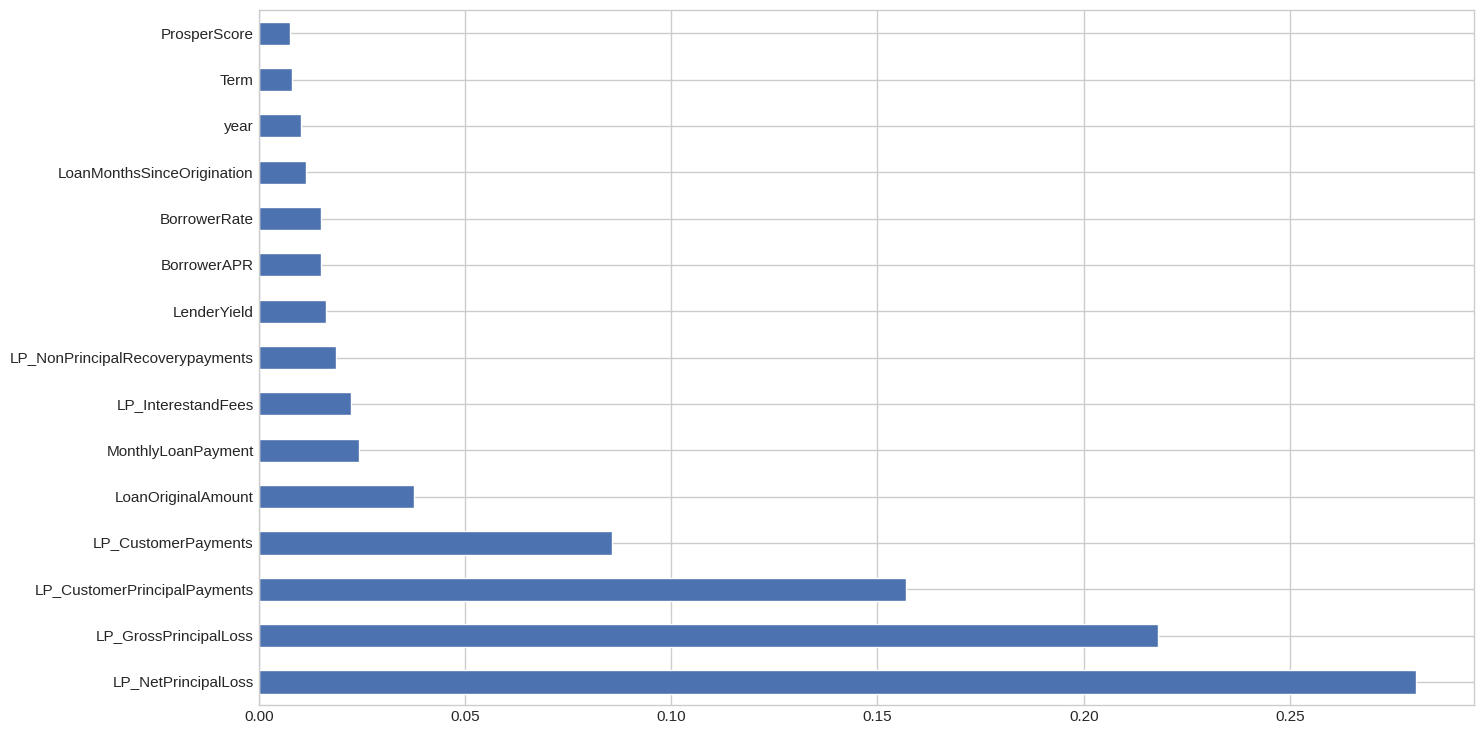

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier()
extra.fit(X, y)

importances = pd.Series(extra.feature_importances_, index = X.columns)
importances.nlargest(15).plot(kind="barh")
plt.show


In [ ]:
importances=importances.sort_values( axis=0, ascending=False)

In [ ]:
im=importances[0:15].index.tolist()

In [ ]:
features=set(mi+fs+im)
features

{'AvailableBankcardCredit',
 'BorrowerAPR',
 'BorrowerRate',
 'CreditScore',
 'DebtToIncomeRatio',
 'Investors',
 'LP_CollectionFees',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_GrossPrincipalLoss',
 'LP_InterestandFees',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'LP_ServiceFees',
 'LenderYield',
 'LoanMonthsSinceOrigination',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'ProsperScore',
 'StatedMonthlyIncome',
 'Term',
 'year'}

In [ ]:

features_PCA = ['LoanOriginalAmount','BorrowerRate','MonthlyLoanPayment','CreditScore','ProsperScore','year','Term','DebtToIncomeRatio']#,'AvailableBankcardCredit','ProsperRating (numeric)','BankcardUtilization','TotalInquiries','DebtToIncomeRatio']
#features = ['LoanOriginalAmount','BorrowerRate','MonthlyLoanPayment','CreditScore','ProsperScore','year','Term','DebtToIncomeRatio','ProsperRating (numeric)']#,'AvailableBankcardCredit','ProsperRating (numeric)','BankcardUtilization','TotalInquiries','DebtToIncomeRatio']

# features = ["BorrowerRate",	'Investors', "CreditScore",'ProsperScore', "TotalInquiries", "MonthlyLoanPayment", "BankcardUtilization", "LoanOriginalAmount", 'year','Term', "DebtToIncomeRatio", "TradesNeverDelinquent (percentage)"]
# features=['LoanOriginalAmount','BorrowerRate','MonthlyLoanPayment','Investors','CreditScore','ProsperScore','ProsperRating (numeric)','InquiriesLast6Months','Term','BankcardUtilization']
# features = ['BorrowerRate','CreditScore','TotalInquiries',  'MonthlyLoanPayment','InquiriesLast6Months','LoanOriginalAmount','BankcardUtilization','DebtToIncomeRatio','TradesNeverDelinquent (percentage)']
X_scaled = X.loc[:, features_PCA]

# Standardizing the main features for the PCA
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)   # row by row

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.172429  0.015355  1.508095 -0.663225 -0.545260 -0.146942  0.213767   
1 -1.412324 -1.214303  0.801549 -0.180366 -0.881495  0.392403  0.353088   
2 -0.348640 -0.029308 -0.943461  0.229979  0.727081  0.901012  1.472892   
3 -0.757361  0.790193 -1.084691  0.339156  1.051994  0.190350 -0.434552   
4 -1.438303 -0.367722  0.927038 -0.295890 -0.631576 -0.108723 -0.068129   

        PC8  
0  0.004358  
1  0.094258  
2 -0.067863  
3 -0.045047  
4  0.042974

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_scaled.columns,  # and the rows are the original features
)

loadings

PC1       PC2       PC3       PC4       PC5  \
LoanOriginalAmount  0.549244  0.327984  0.190168 -0.172096 -0.052988   
BorrowerRate       -0.345024  0.559287 -0.146049  0.058230  0.245431   
MonthlyLoanPayment  0.510881  0.334514  0.281465 -0.140513  0.216441   
CreditScore         0.455451 -0.241751 -0.226840  0.133876  0.151422   
ProsperScore        0.273987 -0.463016 -0.289324  0.112519 -0.105825   
year                0.132541  0.216094 -0.686533  0.191599  0.456752   
Term                0.106691  0.354276 -0.435548 -0.075924 -0.788699   
DebtToIncomeRatio   0.082678  0.150632  0.259015  0.934982 -0.159101   

                         PC6       PC7       PC8  
LoanOriginalAmount -0.120172  0.026521 -0.712056  
BorrowerRate       -0.221997 -0.655328 -0.066803  
MonthlyLoanPayment -0.174962  0.013212  0.671194  
CreditScore         0.599276 -0.531471  0.014817  
ProsperScore       -0.732206 -0.258100  0.015438  
year               -0.017444  0.465880 -0.041581  
Term                0.098354 -0.011478  0.189175  
DebtToIncomeRatio  -0.020718  0.058438 -0.006131

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

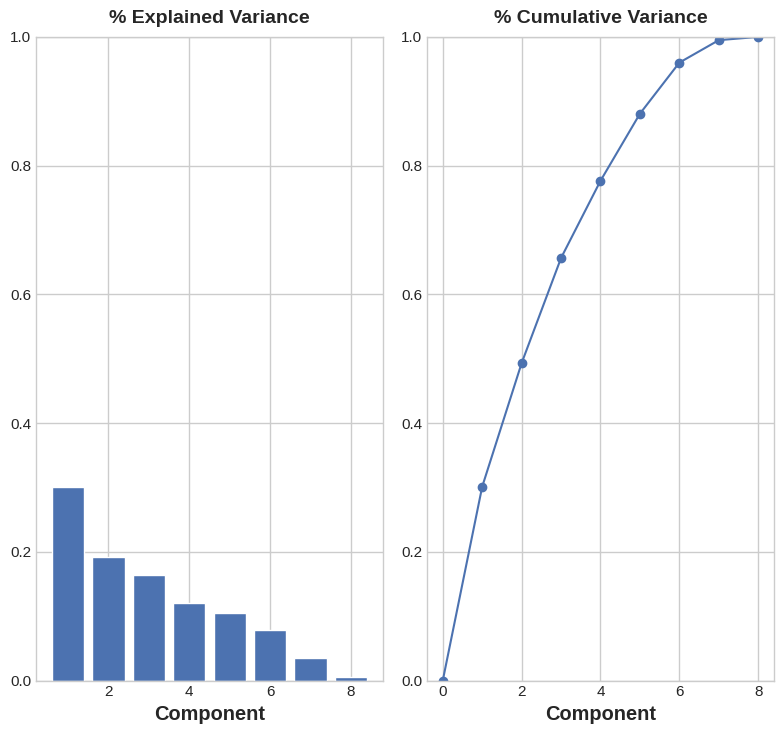

In [ ]:
plot_variance(pca)

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.054315
PC5    0.023490
PC8    0.021379
PC6    0.020258
PC1    0.019477
PC4    0.014293
PC3    0.012741
PC7    0.010671
Name: MI Scores, dtype: float64

In [ ]:
X_PCA = X[features].join(X_pca[['PC2', 'PC5', 'PC6','PC8']])


In [ ]:
model_after_pca = RandomForestClassifier(random_state=0)
model_after_pca_score = cross_val_score(
    model_after_pca, X_PCA, y, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
model_after_pca_score = 100*model_after_pca_score.mean()

print(f"Accuracy Score: {model_after_pca_score:.6}%")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy Score: 99.5012%


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.0s finished


# **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_PCA, y, test_size=0.20, random_state=100)
print(X_PCA.shape, X_train.shape, X_test.shape)


(49724, 26) (39779, 26) (9945, 26)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

 **logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(penalty='l2')
# training the model
model_1.fit(X_train_std, Y_train)

y_pred = model_1.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_lr * 100))

Accuracy: 98.93%


 **Random Forest Classifier**

In [ ]:
model_2 = RandomForestClassifier(random_state=0)
model_2.fit(X_train_std, Y_train)
y_pred = model_2.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(Y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))


Accuracy: 99.52%


In [ ]:
print("Accuracy from logistig regression: {:.2f}%".format(accuracy_lr * 100))
print("Accuracy from radnom forest: {:.2f}%".format(accuracy_rf * 100))

Accuracy from logistig regression: 98.93%
Accuracy from radnom forest: 99.52%


### 3 new Taret Variables + MultiRegression Model

#### ELA

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')
df = loan_data_historical.copy()

In [ ]:
df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month',
       'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage'],
      dtype='object')

In [ ]:
# df = df[['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate',
#        'LenderYield', 'ProsperScore', 'EmploymentStatus',
#        'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
#        'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
#        'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
#        'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
#        'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
#        'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
#        'LoanOriginalAmount', 'MonthlyLoanPayment',
#        'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
#        'Investors', 'MediumWage']]

In [ ]:
# df = df[['CreditGrade', 'Term', 'LoanStatus', 'BorrowerRate',
#        'LenderYield', 'ProsperScore', 'EmploymentStatus',
#        'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
#        'OpenRevolvingAccounts','InquiriesLast6Months', 'TotalInquiries',
#        'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
#        'TradesNeverDelinquent (percentage)','DebtToIncomeRatio',
#        'IncomeVerifiable', 'StatedMonthlyIncome',
#        'LoanOriginalAmount', 'MonthlyLoanPayment',
#        'LP_CustomerPrincipalPayments', 'LP_ServiceFees']]

In [ ]:
df.shape

(49724, 43)

In [ ]:
df_new = df[df['IncomeVerifiable']==True]
print(df_new.shape)
print(df.shape[0]-df_new.shape[0])

(45323, 43)
4401


In [ ]:
df_new['TotalPayment'] = df_new['LoanOriginalAmount'] + (df_new['LoanOriginalAmount'] * df_new['BorrowerRate']) *  df_new['Term']

In [ ]:
df_new['MaxAllow'] = df_new['StatedMonthlyIncome'] * 12 * 0.3

In [ ]:
df_new['ELA'] = df_new.apply(lambda row: row['LoanOriginalAmount'] if row['TotalPayment'] <= row['MaxAllow'] else row['MaxAllow'], axis=1)

In [ ]:
df_new['CreditGrade'].head(20)

0     3
1     3
2     7
3     7
4     4
5     7
6     7
7     7
8     7
9     7
10    3
11    7
12    3
13    4
14    4
15    7
16    5
17    7
18    7
19    7
Name: CreditGrade, dtype: int64

In [ ]:
df_new.drop(columns=['TotalPayment','MaxAllow'],inplace = True)

In [ ]:
df_new.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month',
       'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage', 'ELA'],
      dtype='obj

#### ROI

In [ ]:
def PROI(df):
  df_new['InterestAmount'] = (df_new['LoanOriginalAmount']*(df_new['BorrowerRate']))
  df_new['TotalAmount'] = df_new['InterestAmount'] + df_new['LoanOriginalAmount']
  df_new['ROI'] = (df_new['InterestAmount'] / df_new['TotalAmount'])

  df_new['PROI'] = df_new['ROI'].median()

  for i in range(df.shape[0]):
    if df_new['CreditGrade'].iloc[i]=='E':
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]+0.05
    elif df_new['CreditGrade'].iloc[i]=='HR':
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]+0.05
    elif df_new['CreditGrade'].iloc[i]=='A':
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]-0.05
    elif df_new['CreditGrade'].iloc[i]=='AA':
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]-0.1

    if df_new['TradesNeverDelinquent (percentage)'].iloc[i]<0.7:
      df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05

    if df_new['AvailableBankcardCredit'].iloc[i]<=800:
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]+0.05
    elif df_new['AvailableBankcardCredit'].iloc[i]>=16500:
      df_new['PROI'].iloc[i]=df_new['PROI'].iloc[i]-0.05

    if df_new['TotalInquiries'].iloc[i] > 28:
      df_new['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.1
    elif df_new['TotalInquiries'].iloc[i] > 12:
      df_new['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05

  #print(df_new['ROI'].describe())

  return df_new['PROI']

PROI(df_new)

0        0.161426
1        0.211426
2        0.161426
3        0.211426
4        0.211426
5        0.211426
6        0.161426
7        0.111426
8        0.111426
9        0.161426
10       0.161426
11       0.161426
12       0.161426
13       0.161426
14       0.161426
15       0.161426
16       0.261426
17       0.161426
18       0.161426
19       0.161426
20       0.161426
22       0.211426
23       0.161426
24       0.161426
25       0.211426
26       0.161426
27       0.161426
29       0.211426
30       0.161426
33       0.111426
35       0.211426
36       0.211426
37       0.211426
38       0.261426
39       0.161426
40       0.211426
41       0.261426
42       0.161426
43       0.311426
44       0.161426
46       0.161426
47       0.211426
48       0.161426
49       0.211426
50       0.161426
51       0.261426
52       0.111426
53       0.111426
54       0.161426
55       0.261426
56       0.161426
57       0.161426
58       0.261426
59       0.111426
61       0.161426
62       0

In [ ]:
P = df_new['LP_CustomerPrincipalPayments']
r = df_new['BorrowerRate']
n = df_new['Term']

df_new['EMI'] = ( P*r* ((1+r)**n) ) / ( ((1+r)**n) - 1)
print(df_new['EMI'].describe())


count    45318.000000
mean       883.222555
std        864.156082
min          0.000000
25%        262.521708
50%        612.782672
75%       1236.282696
max       8750.177828
Name: EMI, dtype: float64


In [ ]:
df_new[['PROI','ELA','EMI']].head()

PROI           ELA          EMI
0  0.161426  11099.999999  1496.764570
1  0.211426   1000.000000   134.019825
2  0.161426   8700.000001    12.822517
3  0.211426  19800.000000    66.640814
4  0.211426  13500.000000   623.202574

In [ ]:
df_new.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperScore', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'CreditScore', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Investors', 'year', 'month',
       'YearsWithCredit', 'LowWage', 'MediumWage', 'HighWage', 'ELA',
       'InterestA

In [ ]:
#X = df_new.iloc[:,:-6]
y_1 = df_new[['LoanStatus']]
y_2 = df_new[['PROI','ELA','EMI']]
y = df_new[['PROI','ELA','EMI','LoanStatus']]
df_new.drop(columns='LoanStatus',inplace=True)
X = df_new.iloc[:,:-6]





In [ ]:
X.head()

CreditGrade  Term  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  \
0            3    36      0.16516        0.1580       0.1380             5   
1            3    36      0.15033        0.1325       0.1225             5   
2            7    36      0.17969        0.1435       0.1335             4   
3            7    36      0.35797        0.3177       0.3077             5   
4            4    36      0.21488        0.2075       0.1975             5   

   EmploymentStatus  IsBorrowerHomeowner  CreditScore  CurrentCreditLines  \
0                 1                    1        640.0                 5.0   
1                 1                    0        640.0                 2.0   
2                 1                    0        680.0                 9.0   
3                 0                    1        700.0                10.0   
4                 1                    0        620.0                 4.0   

   ...  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0  ...                   0.00                 0.00   
1  ...                   0.00                 0.00   
2  ...                   0.00                 0.00   
3  ...                3790.25              3790.25   
4  ...                   0.00                 0.00   

   LP_NonPrincipalRecoverypayments  Investors  year  month  YearsWithCredit  \
0                              0.0        258  2007      8               13   
1                              0.0         53  2007     10               14   
2                              0.0          1  2013     12               18   
3                              0.0         10  2012      4               15   
4                              0.0         53  2007     11               11   

   LowWage  MediumWage  HighWage  
0        0           1         0  
1        1           0         0  
2        1           0         0  
3        0           1         0  
4        0           1         0  

[5 rows x 42 columns]

In [ ]:
y.head()

PROI           ELA          EMI  LoanStatus
0  0.161426  11099.999999  1496.764570           1
1  0.211426   1000.000000   134.019825           1
2  0.161426   8700.000001    12.822517           0
3  0.211426  19800.000000    66.640814           0
4  0.211426  13500.000000   623.202574           1

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45323 entries, 0 to 49723
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CreditGrade                         45323 non-null  int64  
 1   Term                                45323 non-null  int64  
 2   BorrowerAPR                         45323 non-null  float64
 3   BorrowerRate                        45323 non-null  float64
 4   LenderYield                         45323 non-null  float64
 5   ProsperScore                        45323 non-null  int64  
 6   EmploymentStatus                    45323 non-null  int64  
 7   IsBorrowerHomeowner                 45323 non-null  int64  
 8   CreditScore                         45323 non-null  float64
 9   CurrentCreditLines                  45323 non-null  float64
 10  OpenCreditLines                     45323 non-null  float64
 11  TotalCreditLinespast7years          45323

In [ ]:
y_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45323 entries, 0 to 49723
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LoanStatus  45323 non-null  int64
dtypes: int64(1)
memory usage: 708.2 KB


In [ ]:
y_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45323 entries, 0 to 49723
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PROI    45323 non-null  float64
 1   ELA     45323 non-null  float64
 2   EMI     45318 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [ ]:
y_1.describe()

LoanStatus
count  45323.000000
mean       0.680493
std        0.466291
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000

In [ ]:
y_2.describe()

PROI            ELA           EMI
count  45323.000000   45323.000000  45318.000000
mean       0.183340   14920.737114    883.222555
std        0.050095   11392.909468    864.156082
min        0.111426       0.000000      0.000000
25%        0.161426    7499.999999    262.521708
50%        0.161426   13050.000000    612.782672
75%        0.211426   19649.999999   1236.282696
max        0.361426  253260.000000   8750.177828

In [ ]:
y_2.fillna(0,inplace=True)
y.fillna(0,inplace=True)


In [ ]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y_2)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y_2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1881.594 (24.299)


In [ ]:

# create datasets
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=15, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y_2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: 242.682 (29.480)


# **Pipeline**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
y_train.head()


PROI           ELA          EMI  LoanStatus
47868  0.161426  11999.999999  1395.013910           1
20905  0.261426  20622.300001  1211.294460           1
20913  0.161426  19800.000000   454.237764           0
363    0.111426   1500.000000   101.372591           1
20290  0.161426  29999.999999  4312.807602           1

In [ ]:
yStatus_train = y_train.iloc[:,3]
yPROI_train = y_train.iloc[:,0]
yELA_train = y_train.iloc[:,1]
yEMI_train = y_train.iloc[:,2]

yStatus_test = y_test.iloc[:,3]
yPROI_test = y_test.iloc[:,0]
yELA_test = y_test.iloc[:,1]
yEMI_test = y_test.iloc[:,2]

yVar_train = y_train.iloc[:,0:3]
yVar_test =  y_test.iloc[:,0:3]

# **Classification**

In [ ]:
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=6)

In [ ]:
qda = QuadraticDiscriminantAnalysis()

rf = RandomForestClassifier(random_state=0)

LR = LogisticRegression(penalty='l2')

reg = DecisionTreeRegressor()

In [ ]:
estimators = [('QDA', qda), ('RandomForest', rf), ("logistic",LR)]
final_estimator = GradientBoostingClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', clf)
])

In [ ]:
model_ensemble.fit(X_train, yStatus_train)
pred = model_ensemble.predict(X_test)
print('test accuracy = ', round(accuracy_score(yStatus_test, pred)*100, 2), '%')

test accuracy =  94.33 %


In [ ]:
print(classification_report(yStatus_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.936     0.881     0.908      2871
           1      0.946     0.972     0.959      6194

    accuracy                          0.943      9065
   macro avg      0.941     0.927     0.933      9065
weighted avg      0.943     0.943     0.943      9065



# **Regression**

In [ ]:
model_reg = Pipeline([
    ('reg', reg)
])

In [ ]:
model_reg.fit(X_train, yVar_train)
pred = model_reg.predict(X_test)
mse = mean_absolute_error(yVar_test, pred)
print('test mean absolute error = ', mse)


test mean absolute error =  262.2260773479221


###Saving Models

In [ ]:
import pickle
pickle.dump(model_ensemble, open('clsmodel.pkl', 'wb'))


In [ ]:
# import pickle
pickle.dump(model_reg, open('rgrmodel.pkl', 'wb'))

In [ ]:
joblib.dump(model_reg, 'regression_model.joblib')
#reg = joblib.load('regression_model.joblib')


['regression_model.joblib']

In [ ]:
joblib.dump(model_ensemble, 'classification_model.joblib')
#cls = joblib.load('classification_model.joblib')


['classification_model.joblib']

In [ ]:
X.iloc[[10]].values

array([[3, 36, 0.1717, 0.15, 0.14, 5, 1, 0, 660.0, 10.0, 9.0, 28.0, 6,
        151.0, 1.0, 7.0, 4519.0, 0.68, 2031.0, 27.0, 0.81, 0.27, True,
        3166.666667, 67, 4000, 138.66, 4667.64, 4000.0, 667.64, -44.51,
        0.0, 0.0, 0.0, 0.0, 103, 2008, 8, 15, 0, 1, 0]], dtype=object)